In [1]:
# https://www.kaggle.com/datasets/iamsouravbanerjee/customer-shopping-trends-dataset

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import gridspec
import plotly

In [3]:
df = pd.read_csv('shopping_trends_updated.csv')
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [4]:
df.tail()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly
3899,3900,52,Female,Handbag,Accessories,81,California,M,Beige,Spring,3.1,No,Store Pickup,No,No,33,Venmo,Quarterly


In [5]:
print(df.shape)
print(df.columns)

(3900, 18)
Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [7]:
df.nunique()

Customer ID               3900
Age                         53
Gender                       2
Item Purchased              25
Category                     4
Purchase Amount (USD)       81
Location                    50
Size                         4
Color                       25
Season                       4
Review Rating               26
Subscription Status          2
Shipping Type                6
Discount Applied             2
Promo Code Used              2
Previous Purchases          50
Payment Method               6
Frequency of Purchases       7
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [10]:
df.describe(include='object')

,Gender,Item Purchased,Category,Location,Size,Color,Season,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Payment Method,Frequency of Purchases
count,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900
unique,2,25,4,50,4,25,4,2,6,2,2,6,7
top,Male,Blouse,Clothing,Montana,M,Olive,Spring,No,Free Shipping,No,No,PayPal,Every 3 Months
freq,2652,171,1737,96,1755,177,999,2847,675,2223,2223,677,584


In [11]:
df.isna().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [12]:
for i in df.columns:
    print(df[i].value_counts())

1       1
2621    1
2593    1
2594    1
2595    1
       ..
1305    1
1306    1
1307    1
1308    1
3900    1
Name: Customer ID, Length: 3900, dtype: int64
69    88
57    87
41    86
25    85
49    84
50    83
54    83
27    83
62    83
32    82
19    81
58    81
42    80
43    79
28    79
31    79
37    77
46    76
29    76
68    75
59    75
63    75
56    74
36    74
55    73
52    73
64    73
35    72
51    72
65    72
40    72
45    72
47    71
66    71
30    71
23    71
38    70
53    70
18    69
21    69
26    69
34    68
48    68
24    68
39    68
70    67
22    66
61    65
60    65
33    63
20    62
67    54
44    51
Name: Age, dtype: int64
Male      2652
Female    1248
Name: Gender, dtype: int64
Blouse        171
Jewelry       171
Pants         171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Belt          161
Sunglasses    161
Coat          161
Sandals       160
Socks         159
Skirt         158
Shorts        157
Scarf         157
Hat           15

# `EXPLORATORY DATA ANSLYSIS`

In [13]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [14]:
df.nunique()

Customer ID               3900
Age                         53
Gender                       2
Item Purchased              25
Category                     4
Purchase Amount (USD)       81
Location                    50
Size                         4
Color                       25
Season                       4
Review Rating               26
Subscription Status          2
Shipping Type                6
Discount Applied             2
Promo Code Used              2
Previous Purchases          50
Payment Method               6
Frequency of Purchases       7
dtype: int64

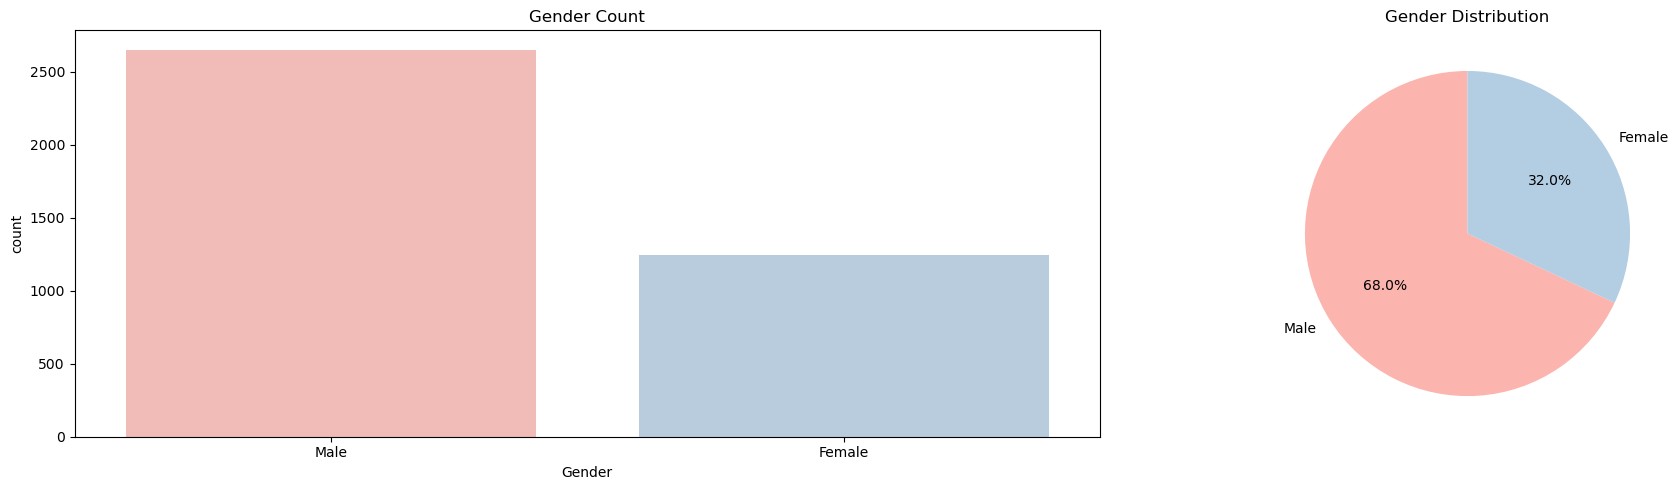

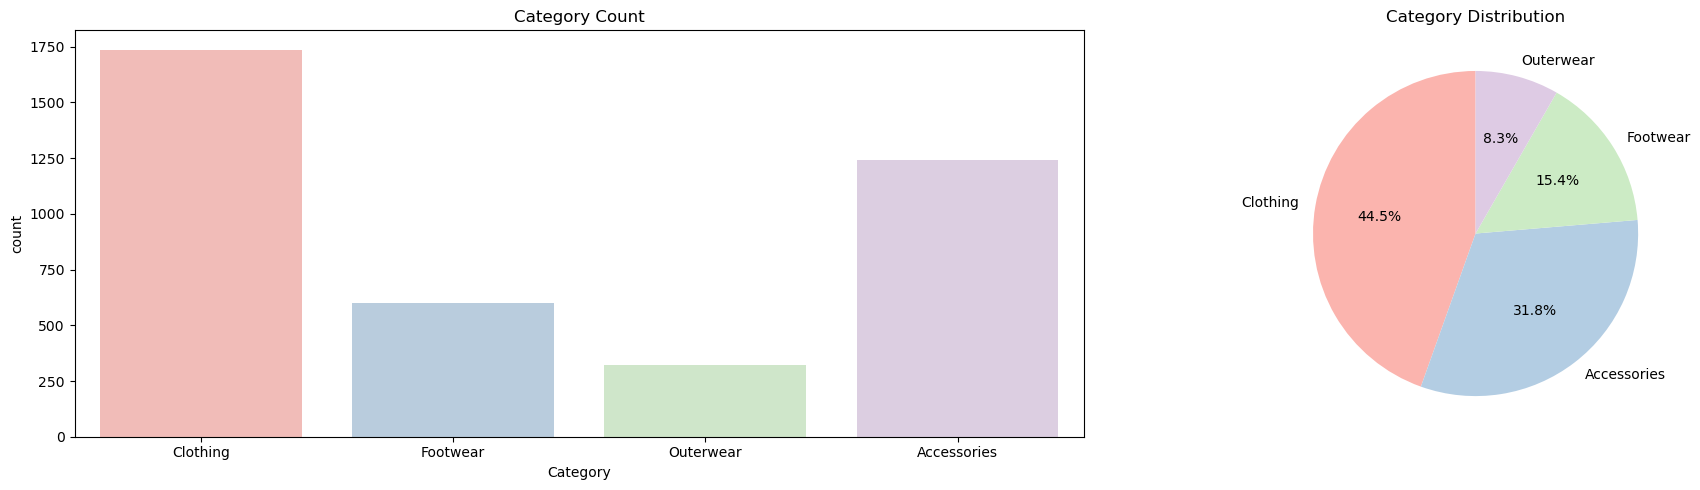

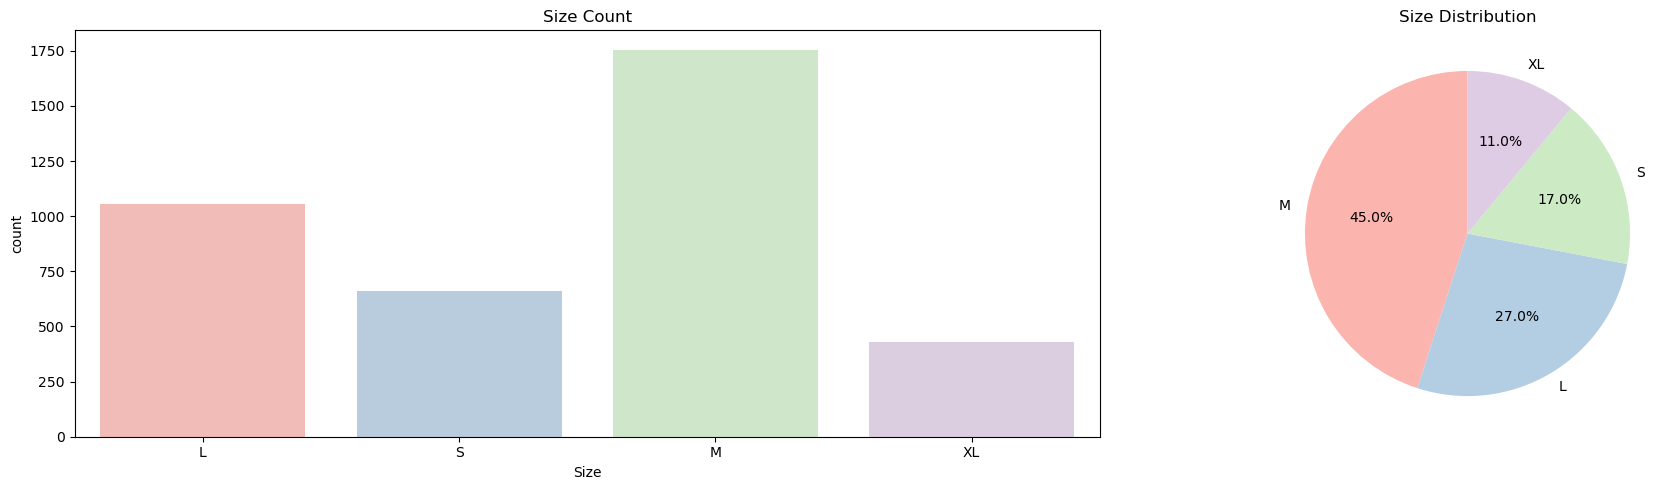

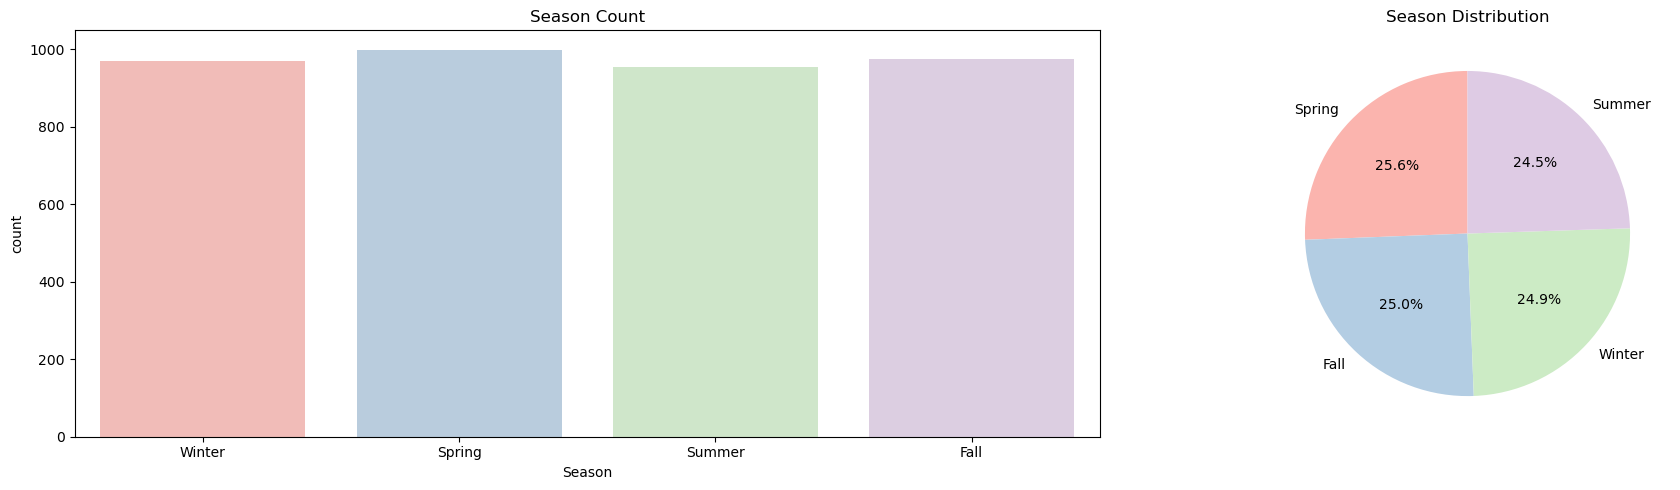

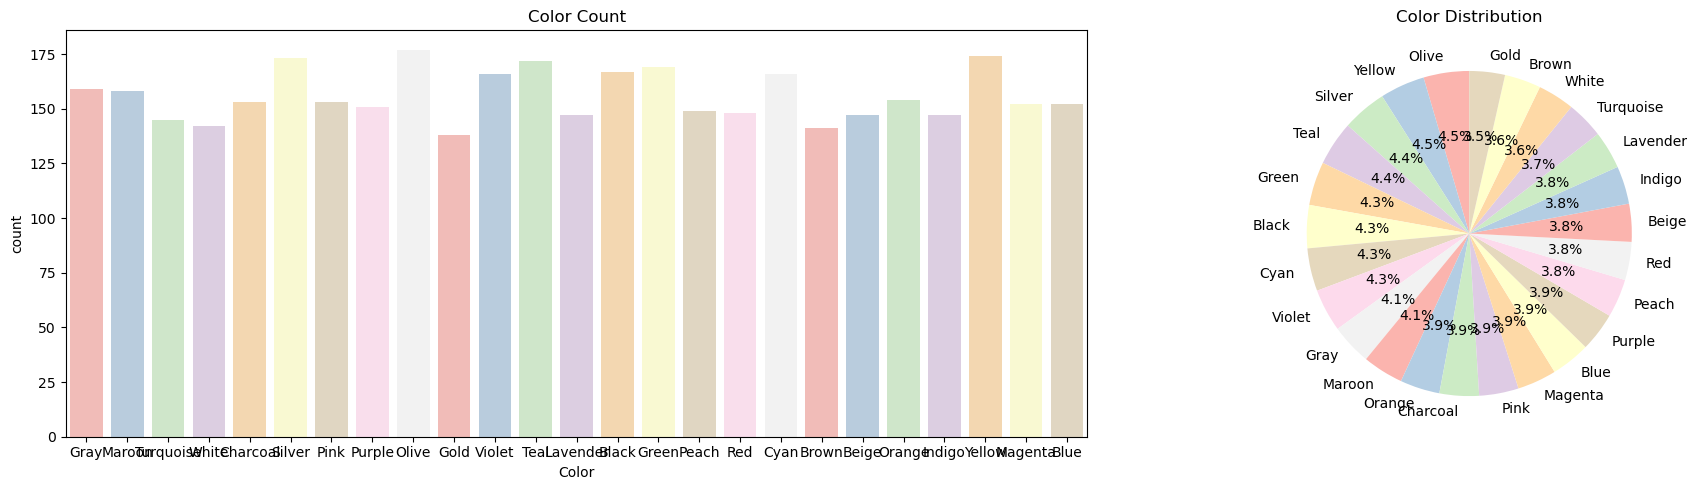

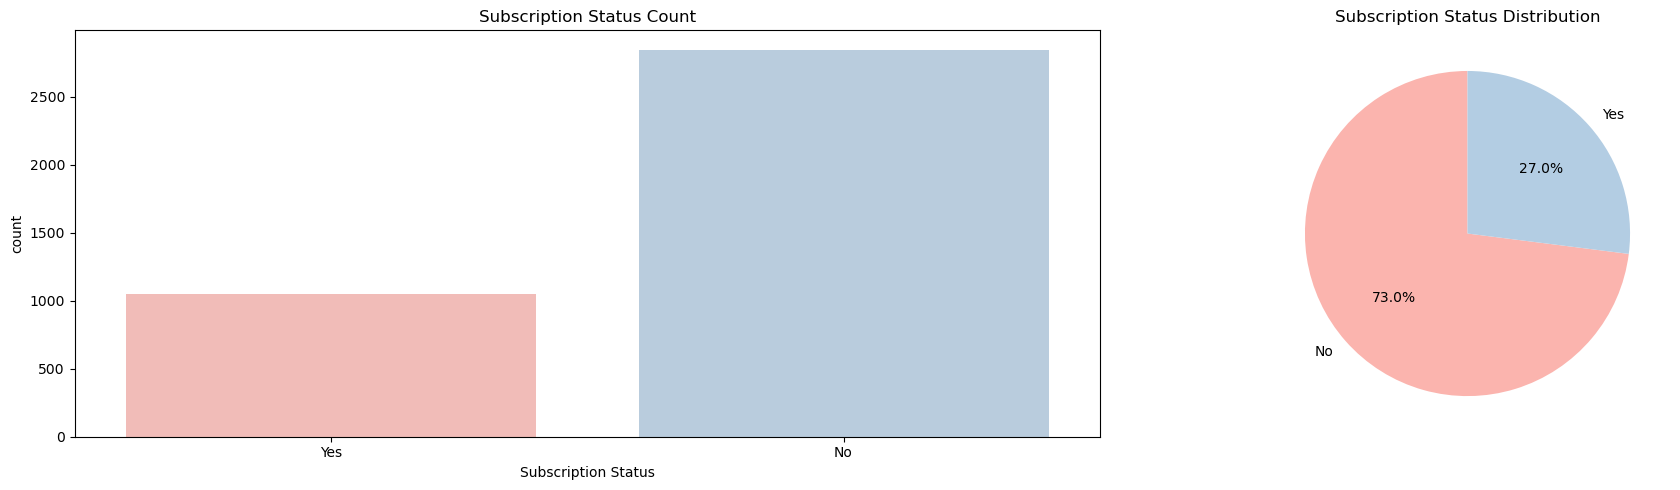

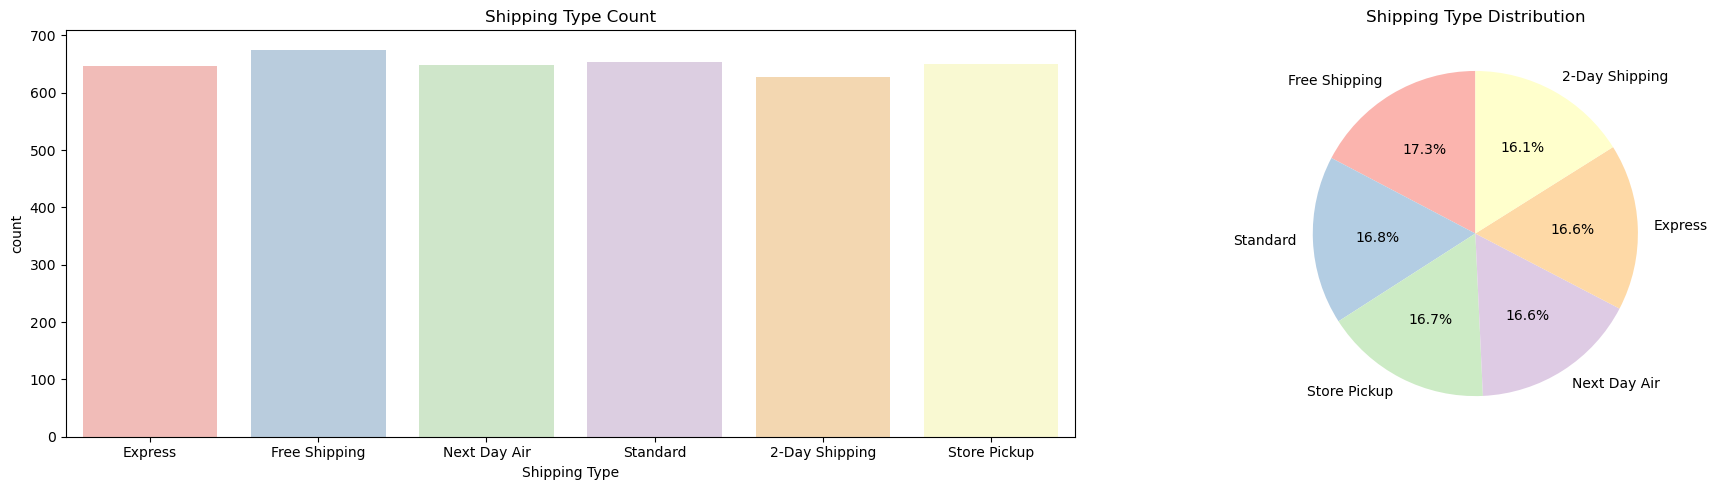

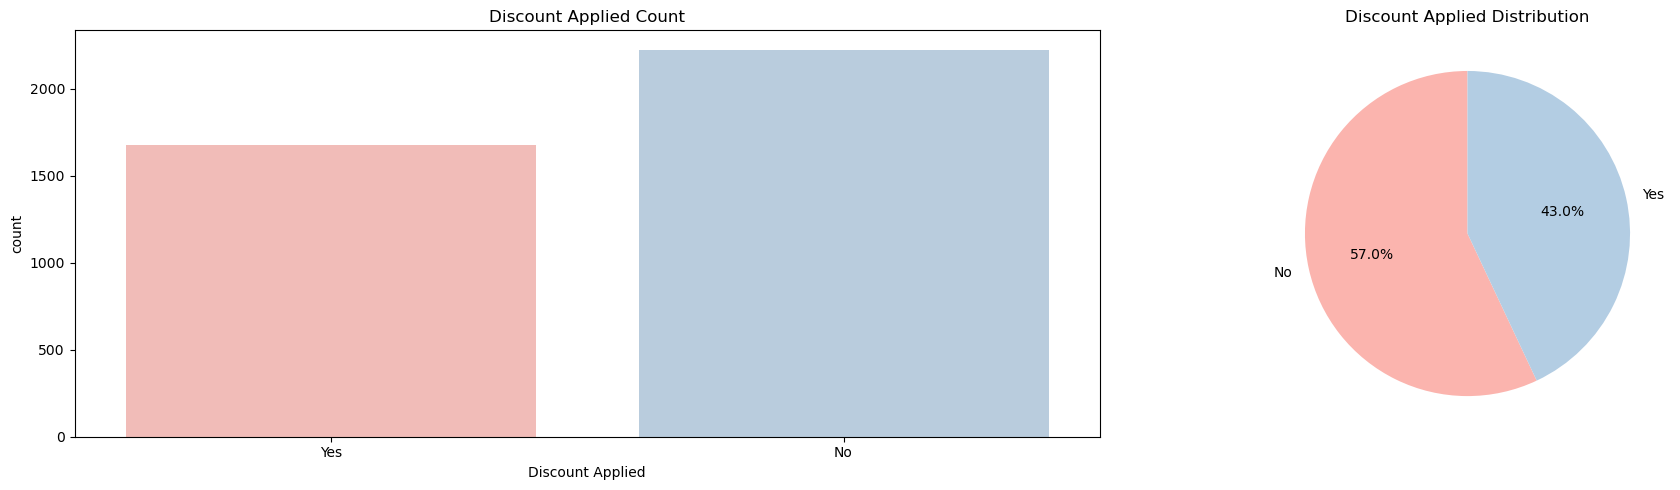

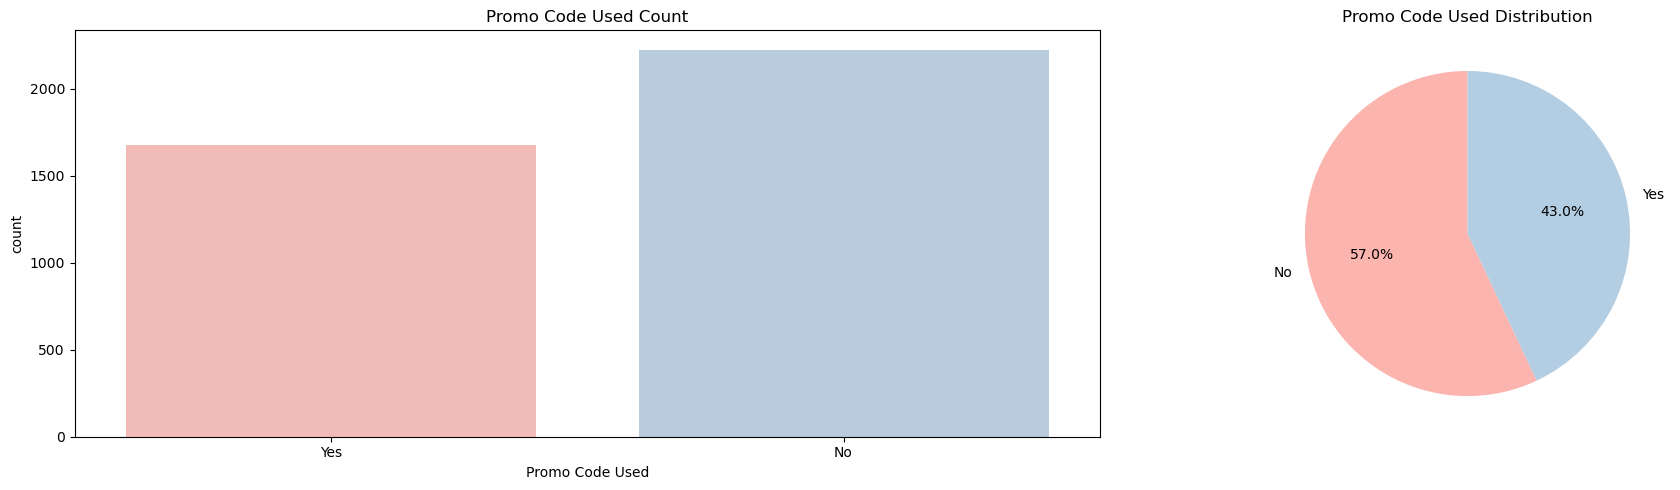

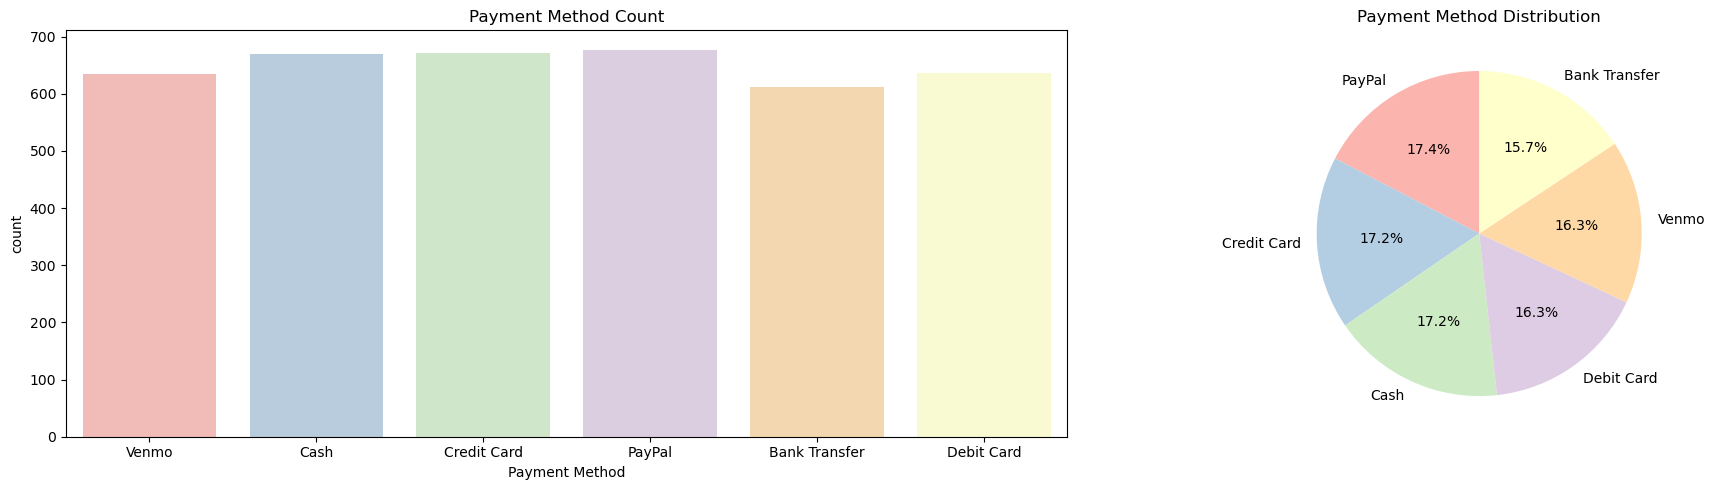

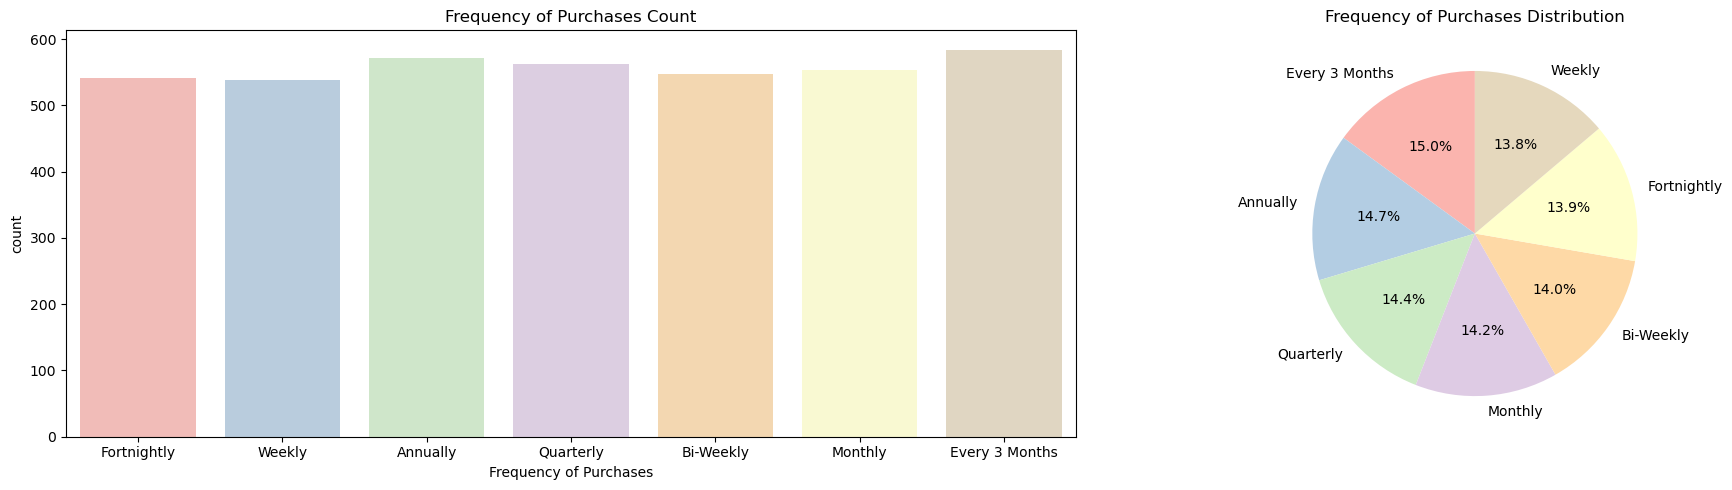

In [15]:
cols = ['Gender', 'Category', 'Size', 'Season','Color', 'Subscription Status', 'Shipping Type', 'Discount Applied', 'Promo Code Used', 'Payment Method', 'Frequency of Purchases']

# Iterate through each column
for col in cols:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

    # Countplot on the left side
    sns.countplot(x=col, data=df, ax=axes[0], palette='Pastel1')
    axes[0].set_title(f'{col} Count')

    # Pie plot on the right side
    col_counts = df[col].value_counts()
    axes[1].pie(col_counts, labels=col_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Pastel1'))
    axes[1].set_title(f'{col} Distribution')

    # Adjust layout
    plt.tight_layout()
    plt.show()


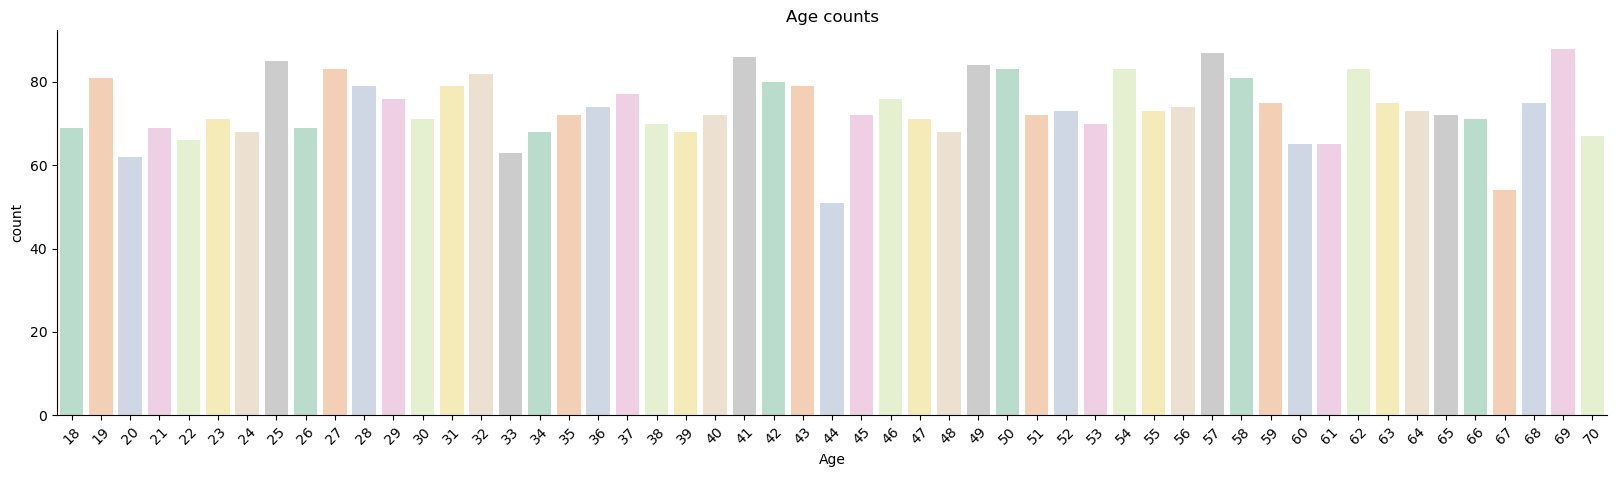

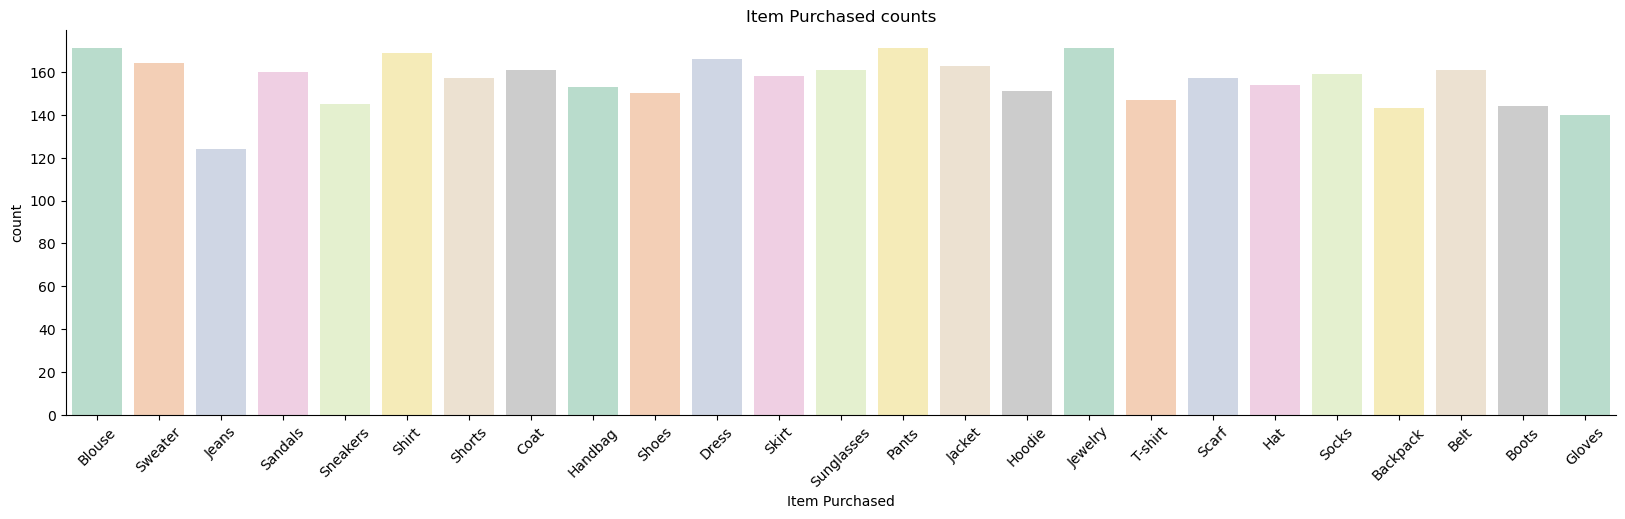

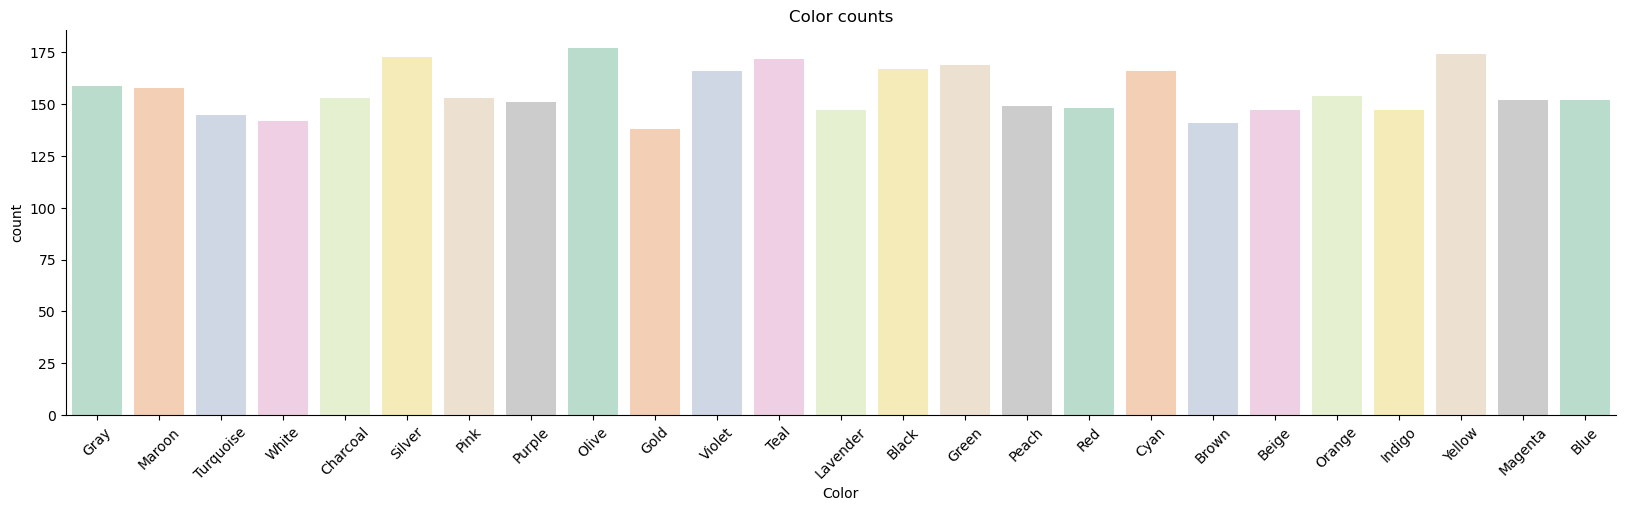

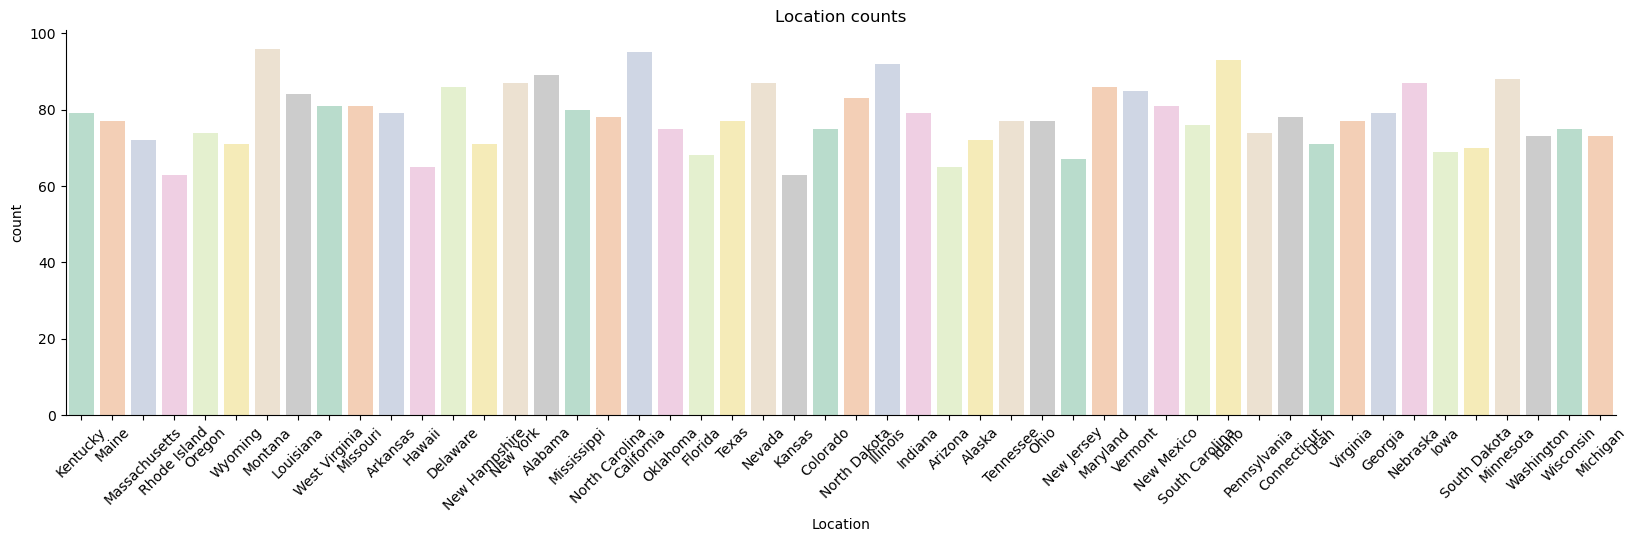

In [16]:
cols = ['Age','Item Purchased','Color', 'Location']
for col in cols:
    plt.figure(figsize=(20,5))
    sns.countplot(x=col,data=df,palette='Pastel2')
    plt.title(f'{col} counts')
    plt.xticks(rotation=45)
    sns.despine()
    plt.show()

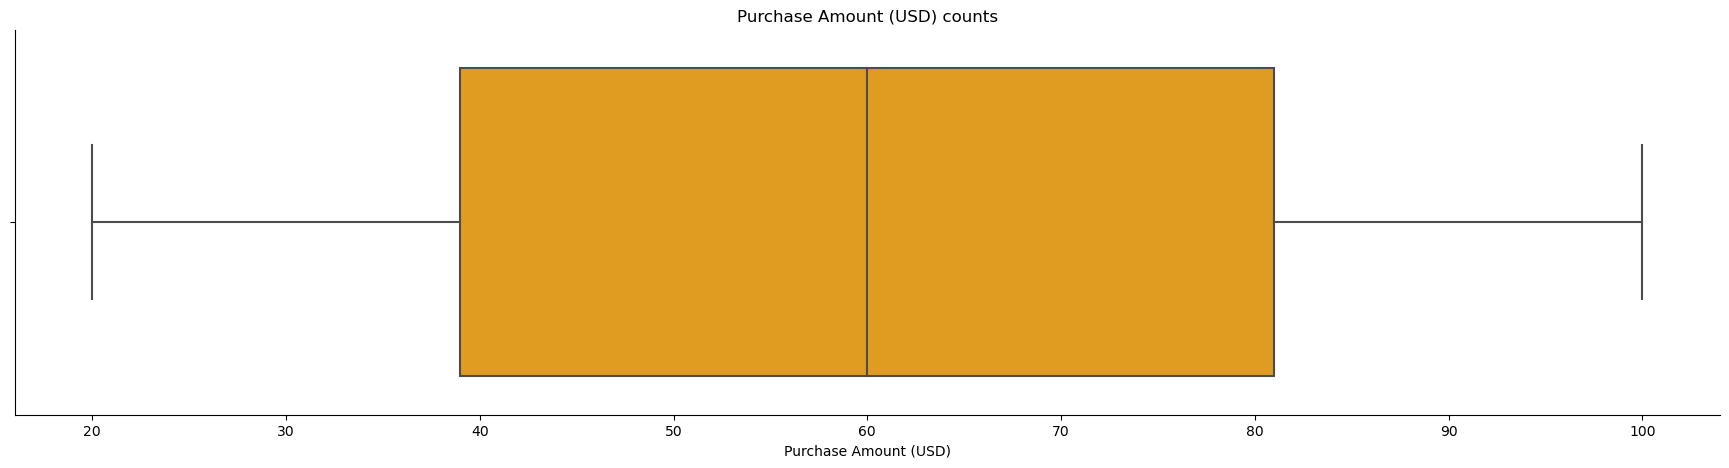

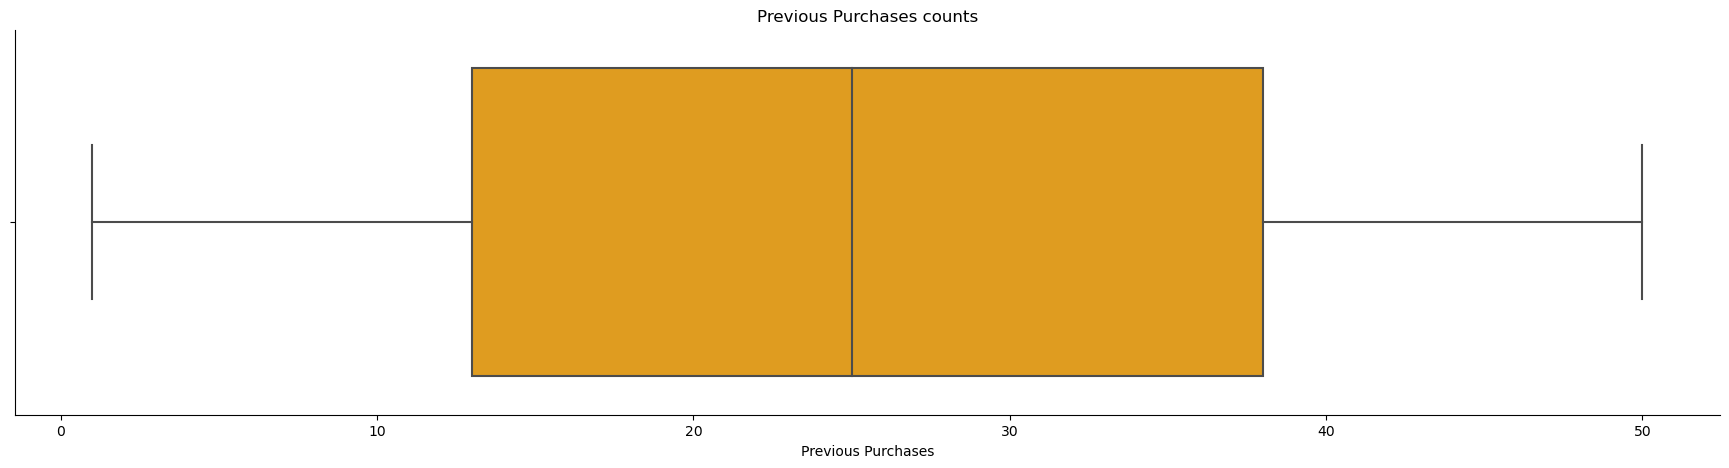

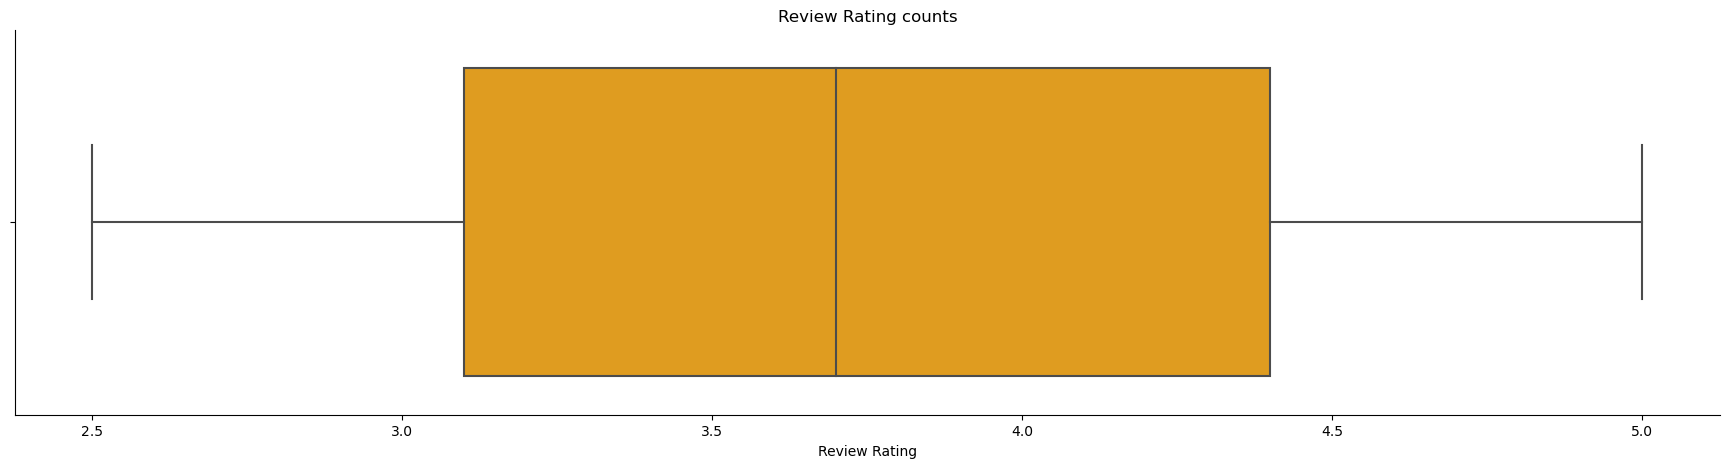

In [17]:
nums = ['Purchase Amount (USD)','Previous Purchases','Review Rating']
for num in nums:
    plt.figure(figsize=(22,5))
    sns.boxplot(x=num,data=df,color='orange')
    plt.title(f'{num} counts')
    sns.despine()
    plt.show()

# `FEATURE ENGINEERING`

In [18]:
bins = [18, 25, 35, 45, 60, 100]  # Specify the bin edges
labels = ['18-25', '26-35', '36-45', '46-60', '60+']  # Specify the labels for each bin

# Create a new column 'Age_Category' with the binned values
df['Age_Category'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Display the updated DataFrame
print(df[['Age', 'Age_Category']])

      Age Age_Category
0      55        46-60
1      19        18-25
2      50        46-60
3      21        18-25
4      45        46-60
...   ...          ...
3895   40        36-45
3896   52        46-60
3897   46        46-60
3898   44        36-45
3899   52        46-60

[3900 rows x 2 columns]


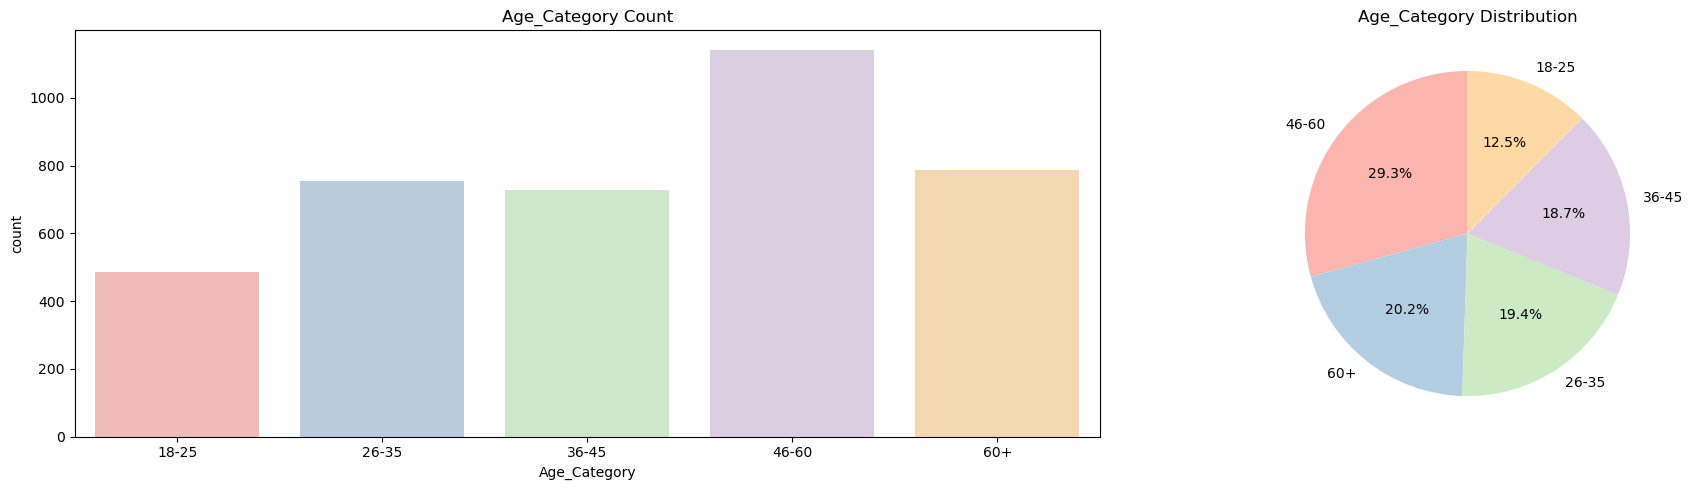

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

sns.countplot(x='Age_Category', data=df, ax=axes[0], palette='Pastel1')
axes[0].set_title('Age_Category Count')

col_counts = df['Age_Category'].value_counts()
axes[1].pie(col_counts, labels=col_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Pastel1'))
axes[1].set_title('Age_Category Distribution')

plt.tight_layout()
plt.show()

# `DATA ANALYSIS`

In [20]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases', 'Age_Category'],
      dtype='object')

In [21]:
df.groupby('Age_Category')['Color'].count()

Age_Category
18-25     486
26-35     755
36-45     729
46-60    1142
60+       788
Name: Color, dtype: int64

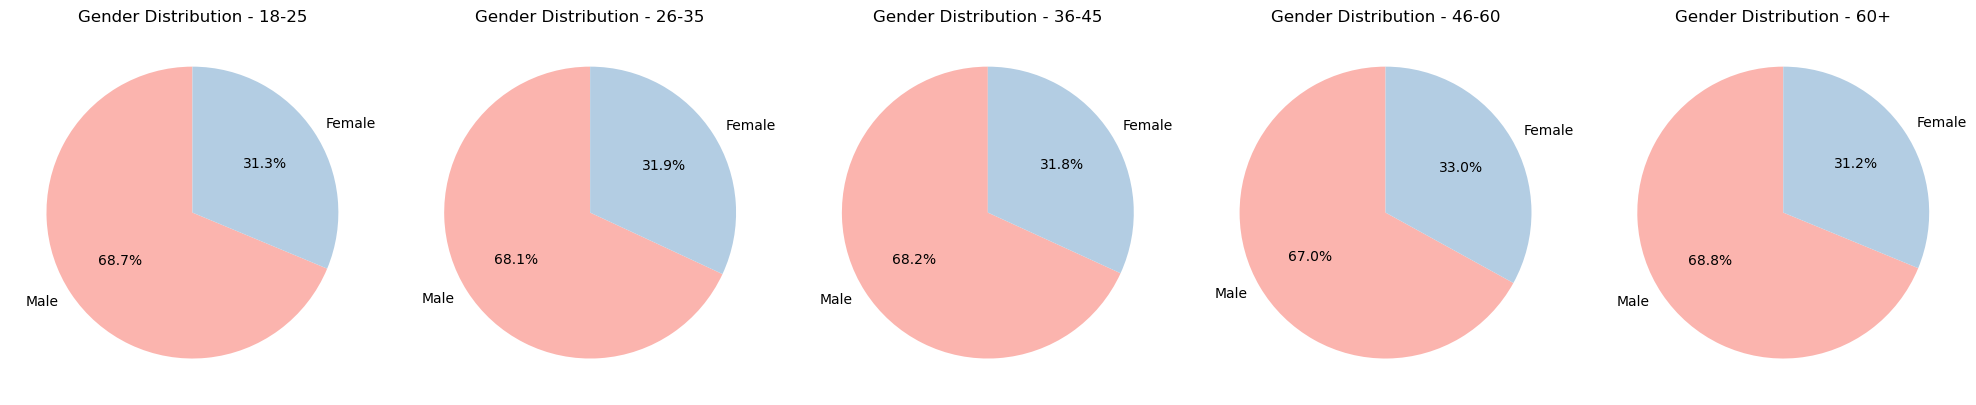

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=len(labels), figsize=(20, 5))

# Iterate through each age category
for i, age_category in enumerate(labels):
    # Filter DataFrame for the specific age category
    subset_df = df[df['Age_Category'] == age_category]

    # Pie plot for color distribution
    color_counts = subset_df['Gender'].value_counts()
    axes[i].pie(color_counts, labels=color_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Pastel1'))
    axes[i].set_title(f'Gender Distribution - {age_category}')

# Adjust layout
plt.tight_layout()
plt.show()


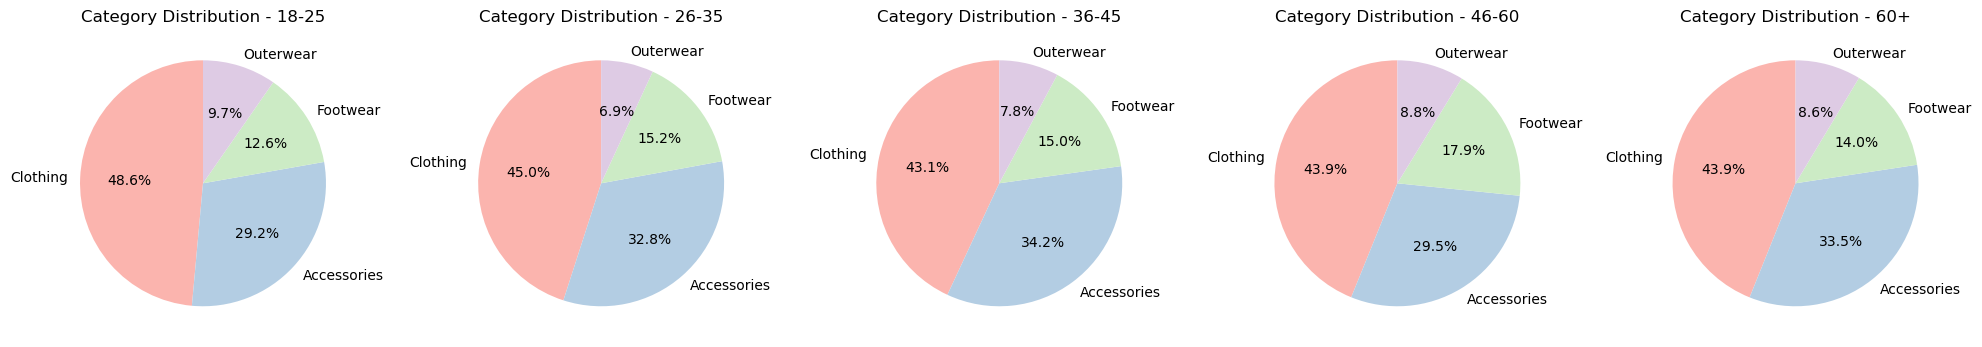

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=len(labels), figsize=(20, 5))

# Iterate through each age category
for i, age_category in enumerate(labels):
    # Filter DataFrame for the specific age category
    subset_df = df[df['Age_Category'] == age_category]

    # Pie plot for color distribution
    color_counts = subset_df['Category'].value_counts()
    axes[i].pie(color_counts, labels=color_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Pastel1'))
    axes[i].set_title(f'Category Distribution - {age_category}')

# Adjust layout
plt.tight_layout()
plt.show()

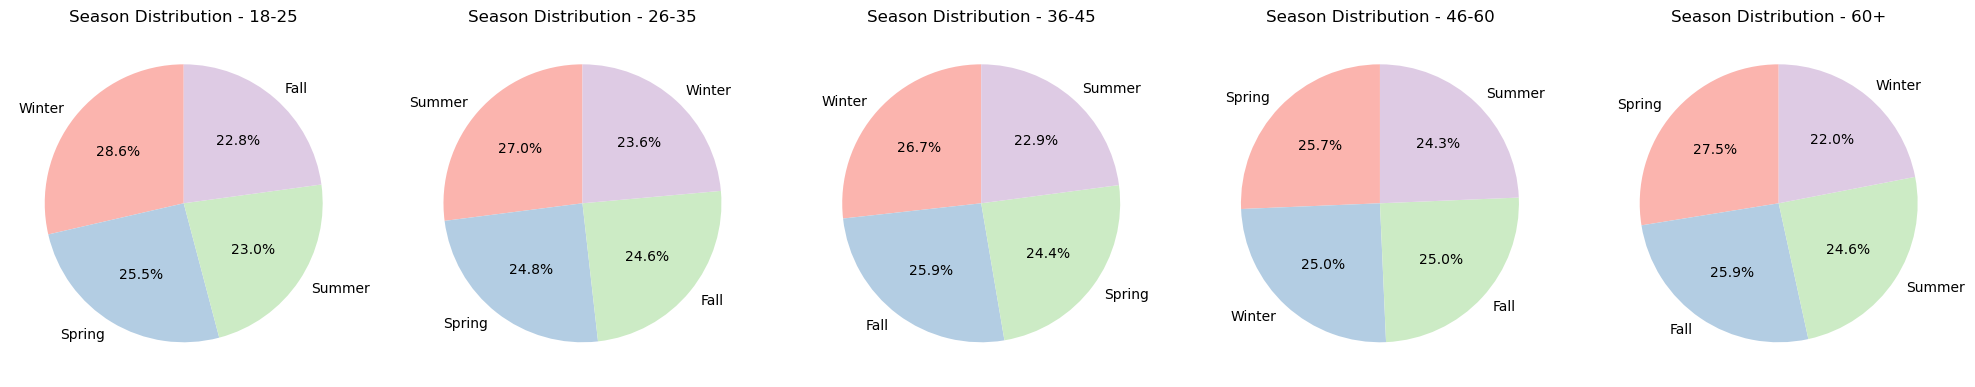

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=len(labels), figsize=(20, 5))

# Iterate through each age category
for i, age_category in enumerate(labels):
    # Filter DataFrame for the specific age category
    subset_df = df[df['Age_Category'] == age_category]

    # Pie plot for color distribution
    color_counts = subset_df['Season'].value_counts()
    axes[i].pie(color_counts, labels=color_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Pastel1'))
    axes[i].set_title(f'Season Distribution - {age_category}')

# Adjust layout
plt.tight_layout()
plt.show()


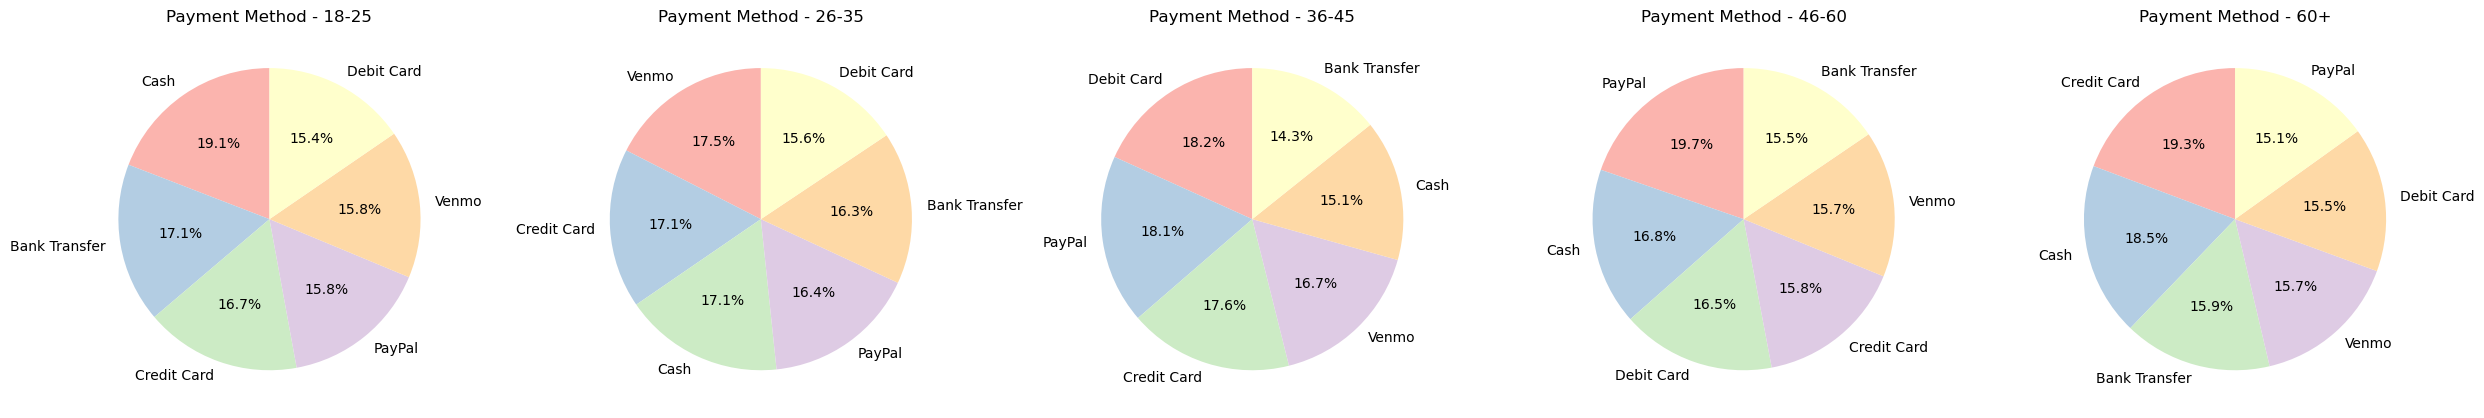

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=len(labels), figsize=(25, 5))

# Iterate through each age category
for i, age_category in enumerate(labels):
    # Filter DataFrame for the specific age category
    subset_df = df[df['Age_Category'] == age_category]

    # Pie plot for color distribution
    color_counts = subset_df['Payment Method'].value_counts()
    axes[i].pie(color_counts, labels=color_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Pastel1'))
    axes[i].set_title(f'Payment Method - {age_category}')

# Adjust layout
plt.tight_layout()
plt.show()


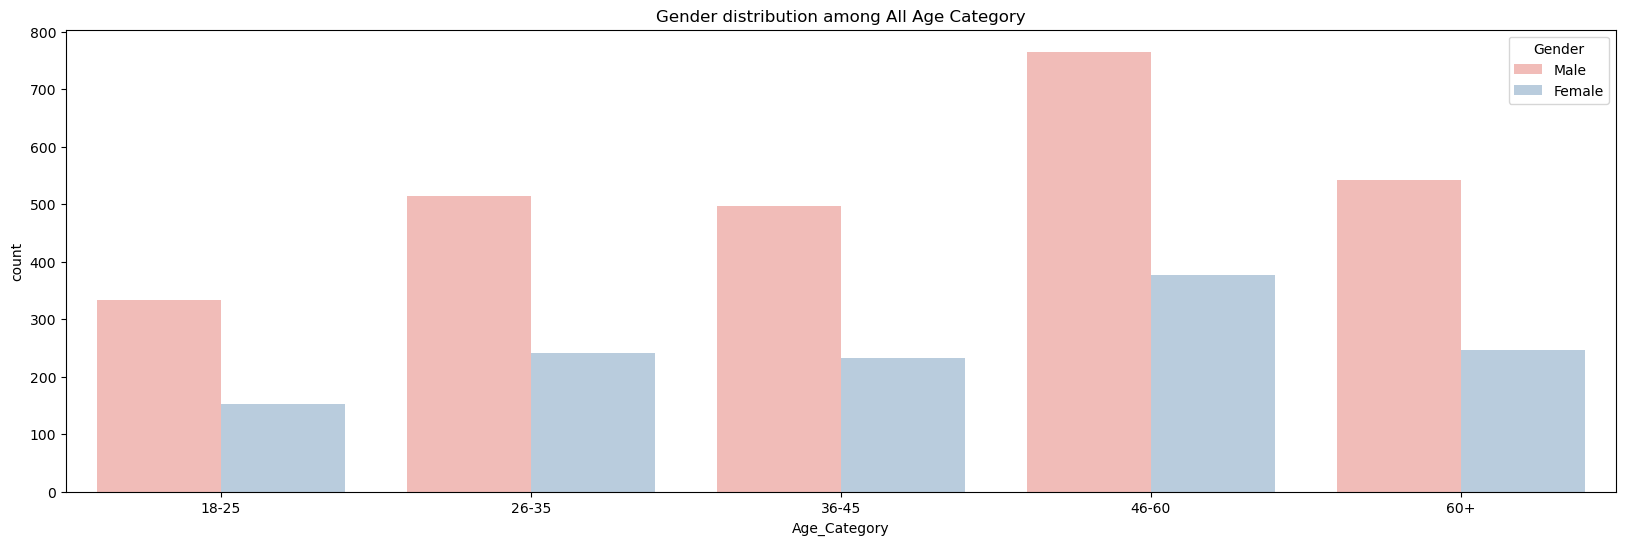

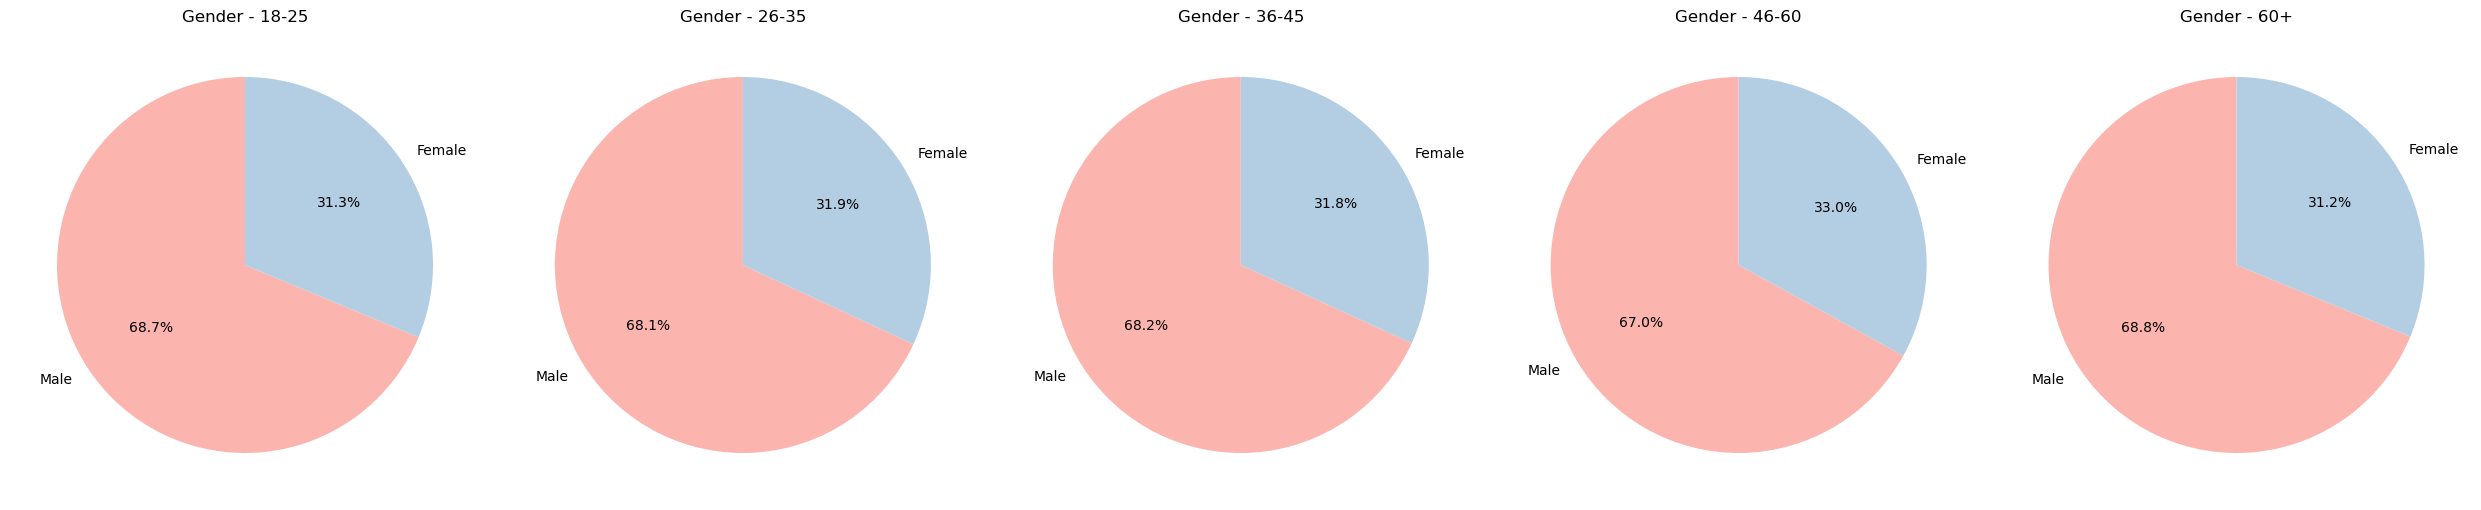

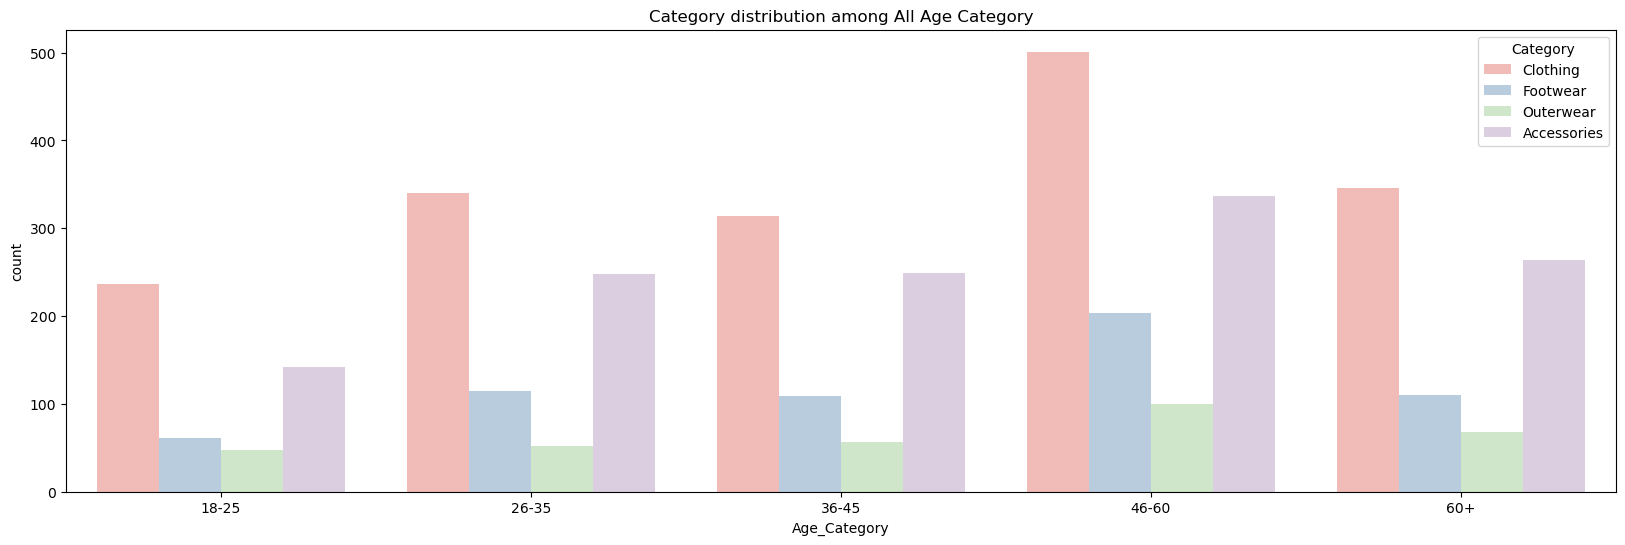

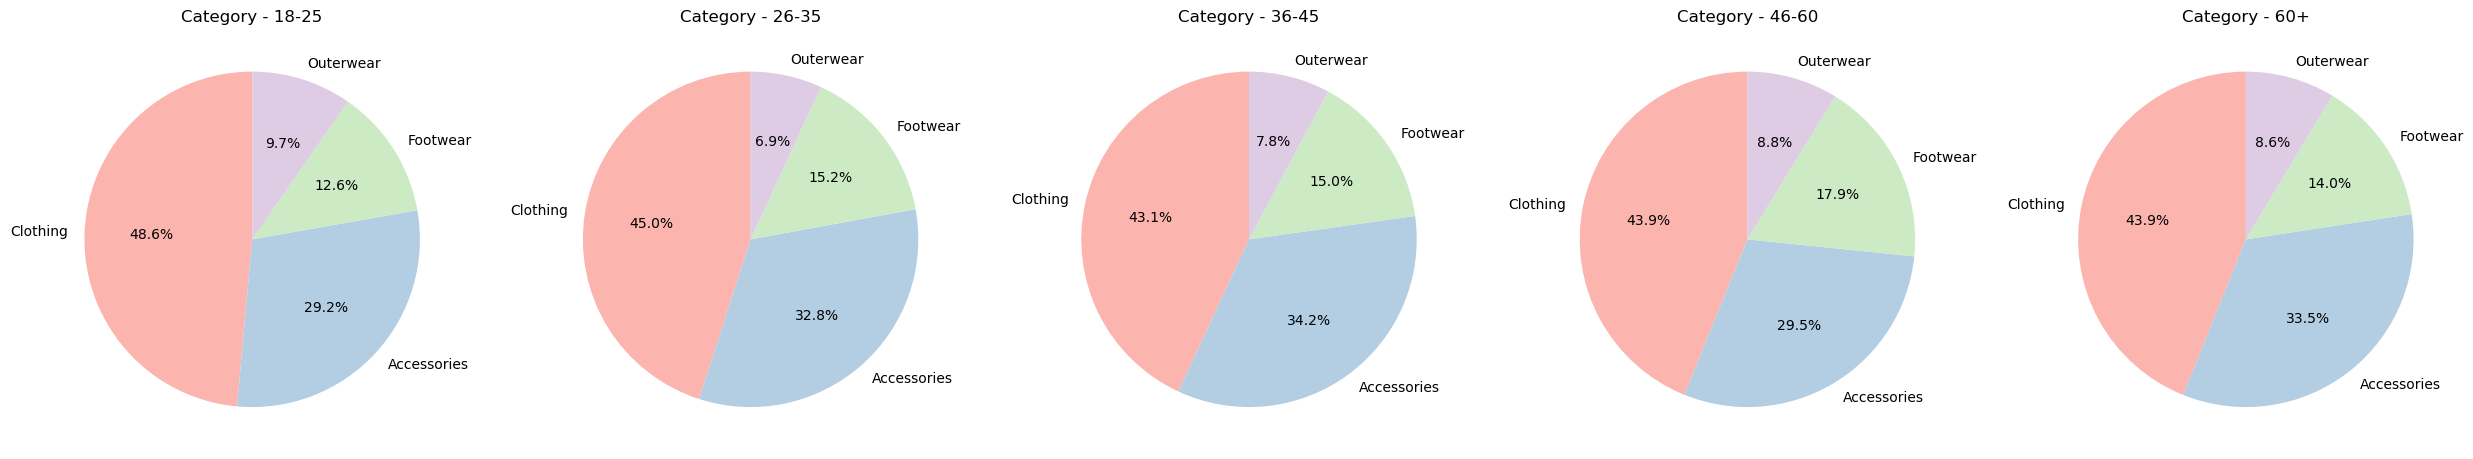

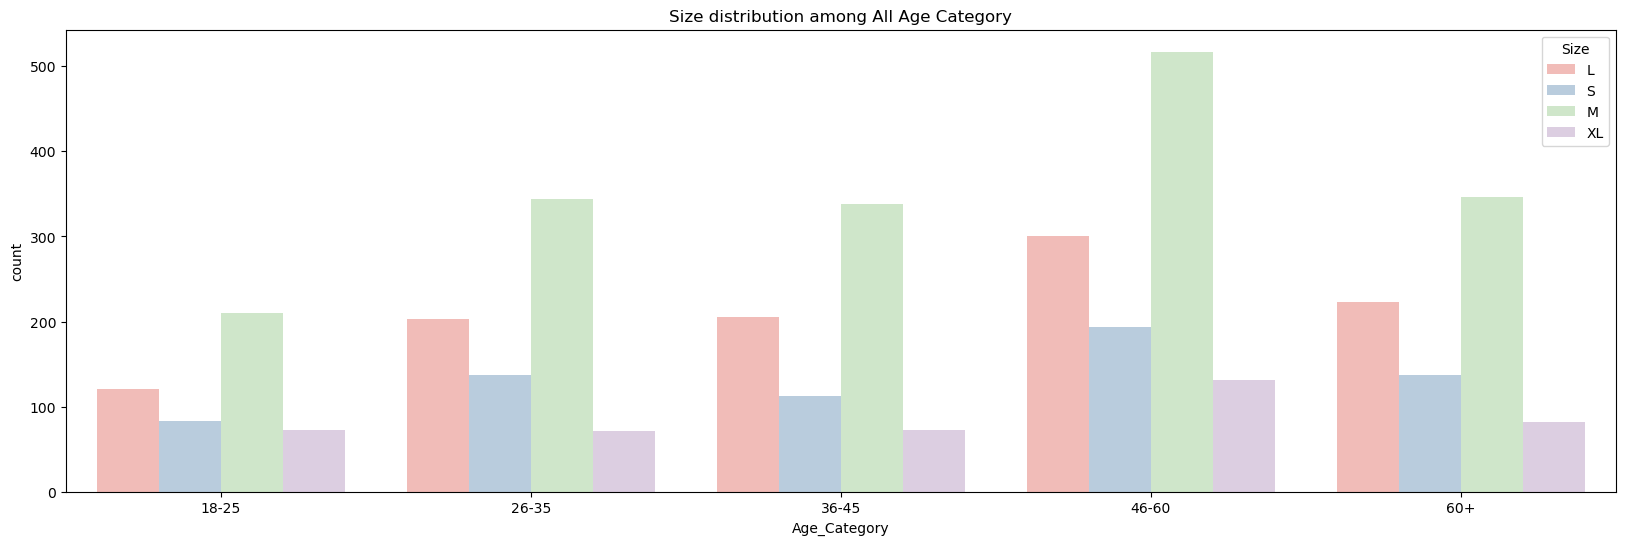

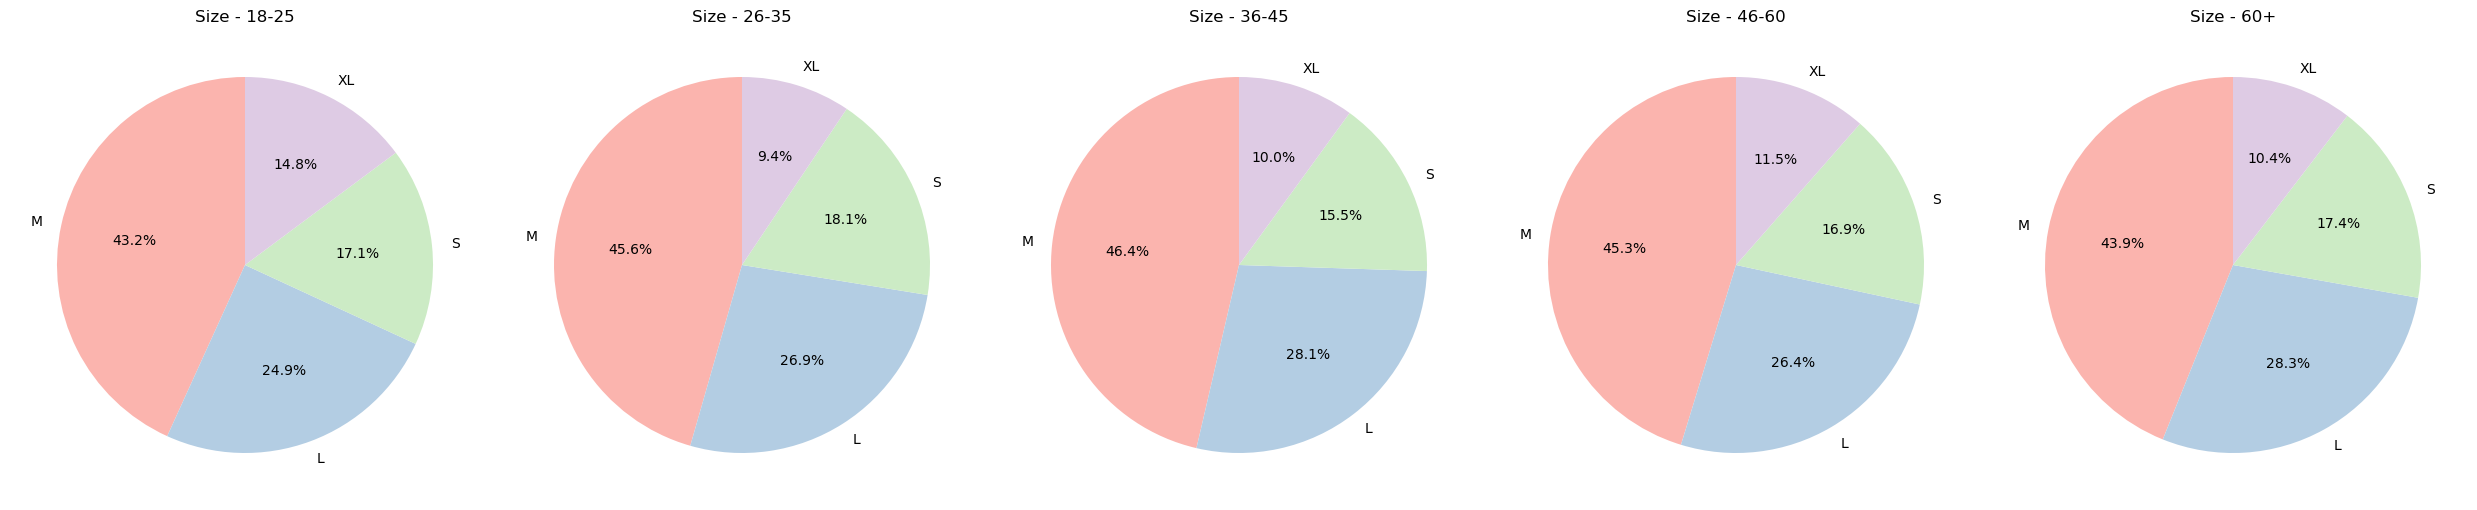

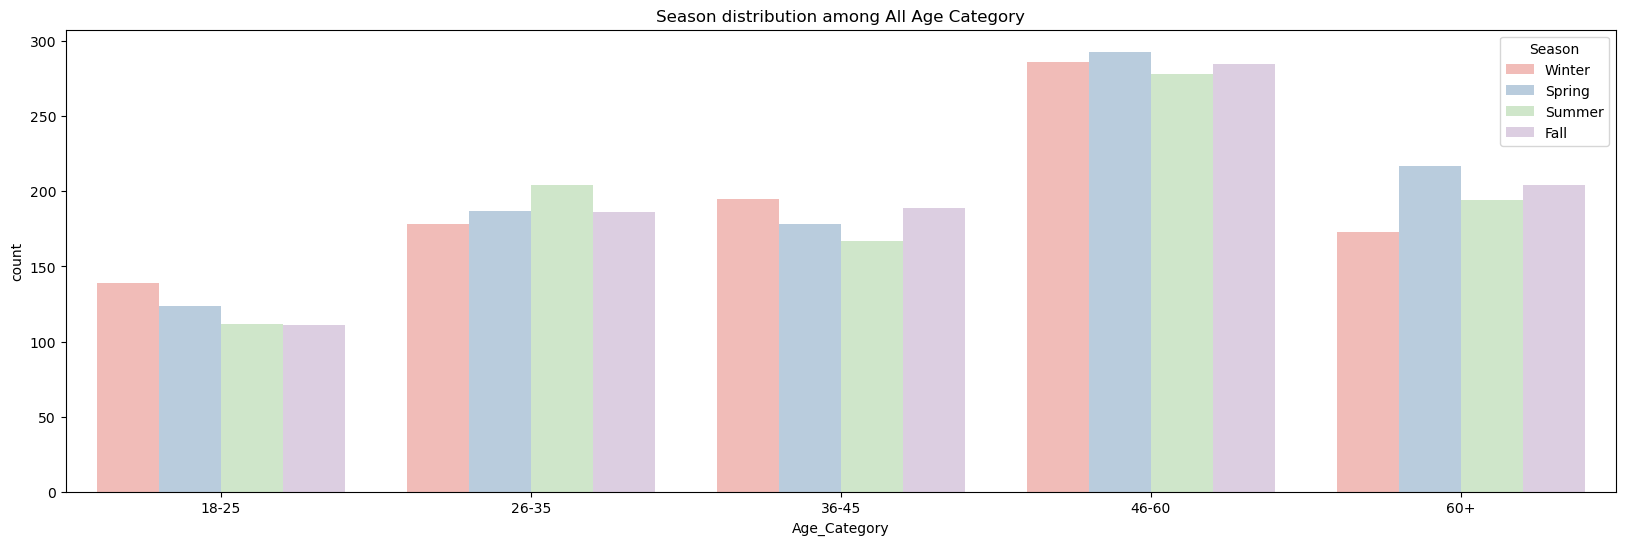

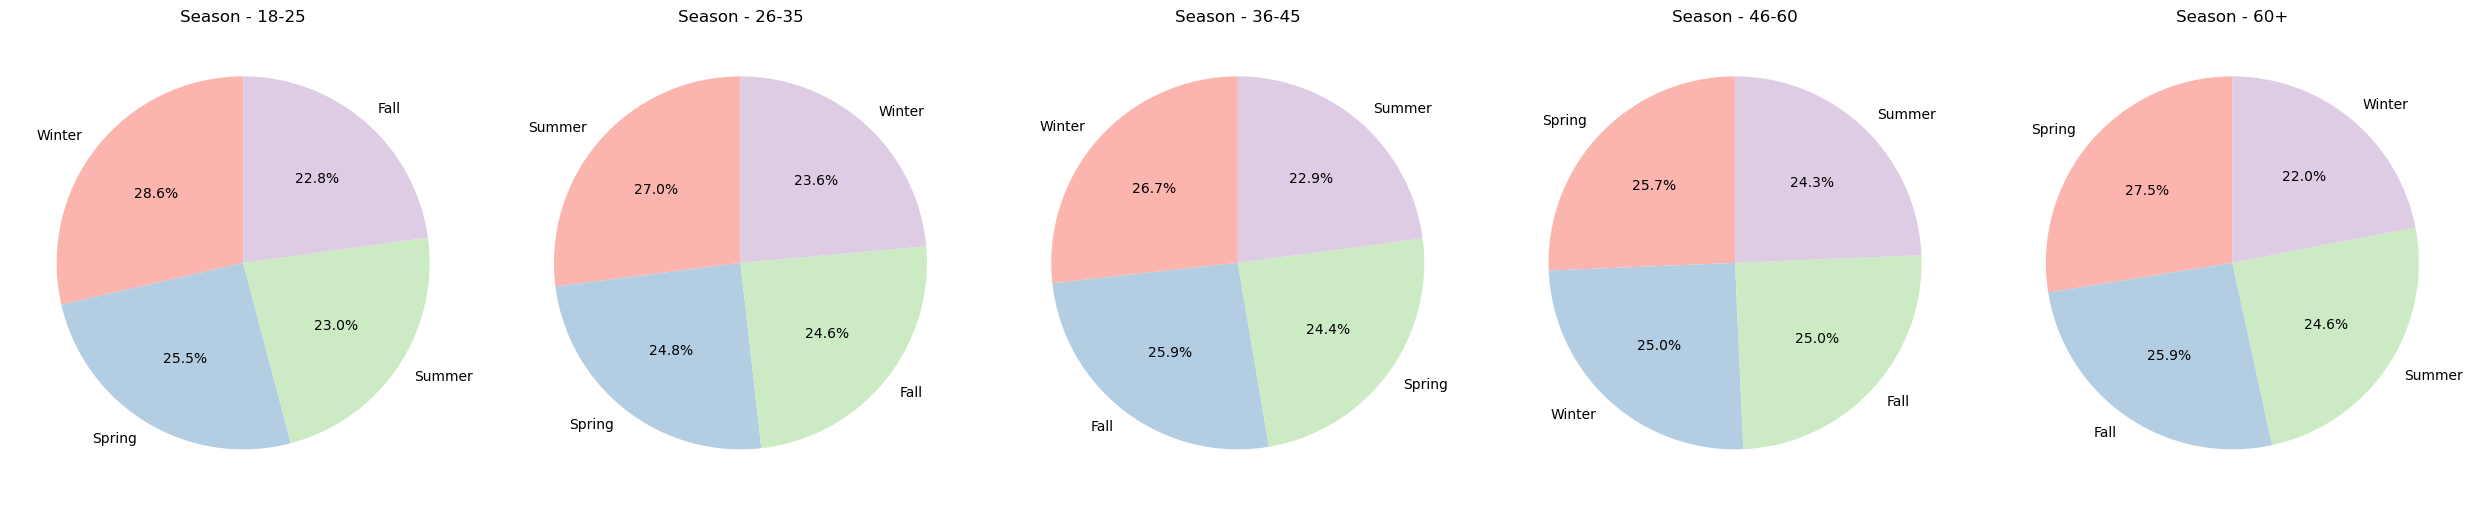

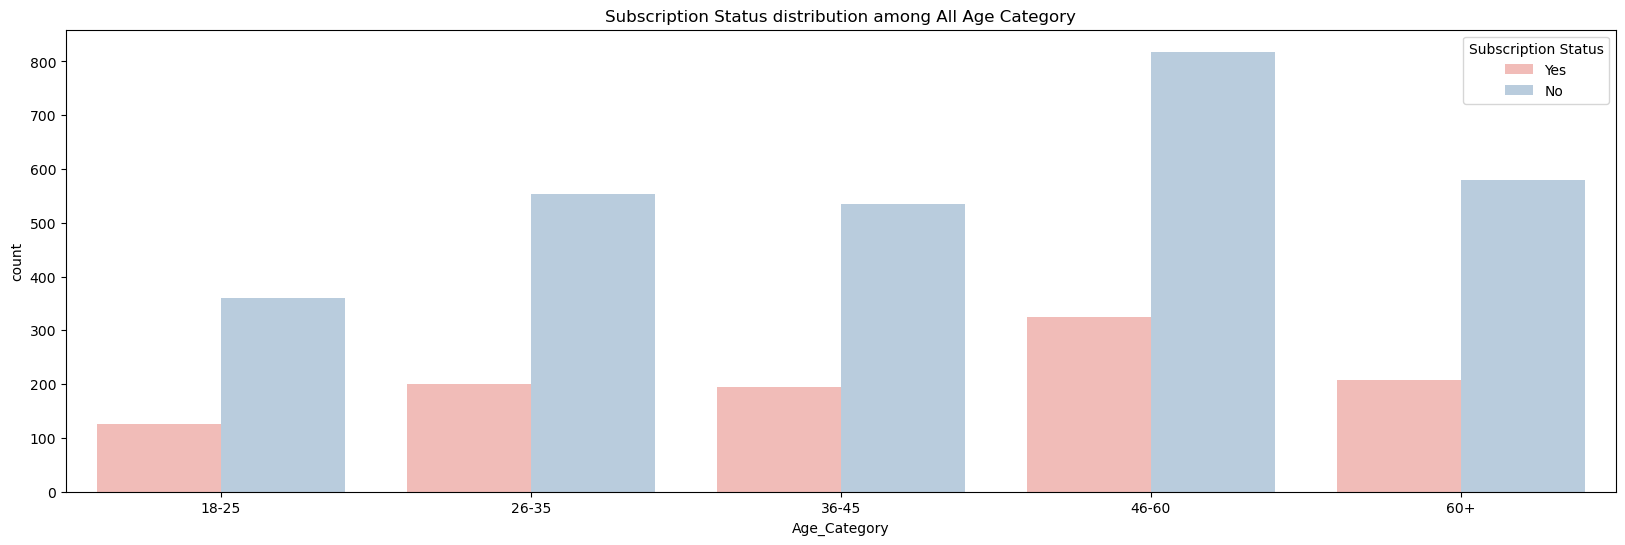

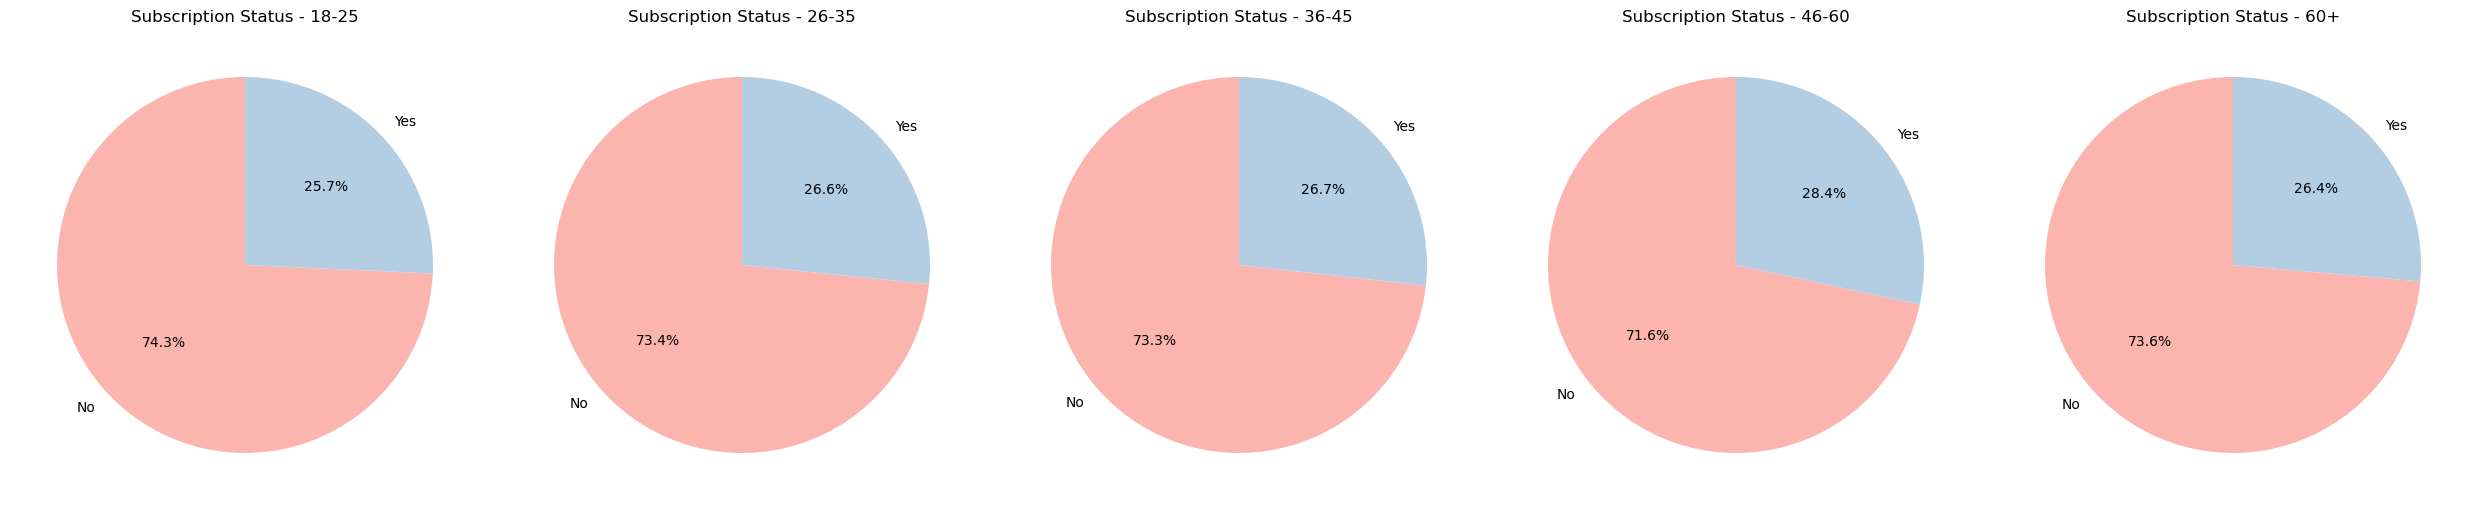

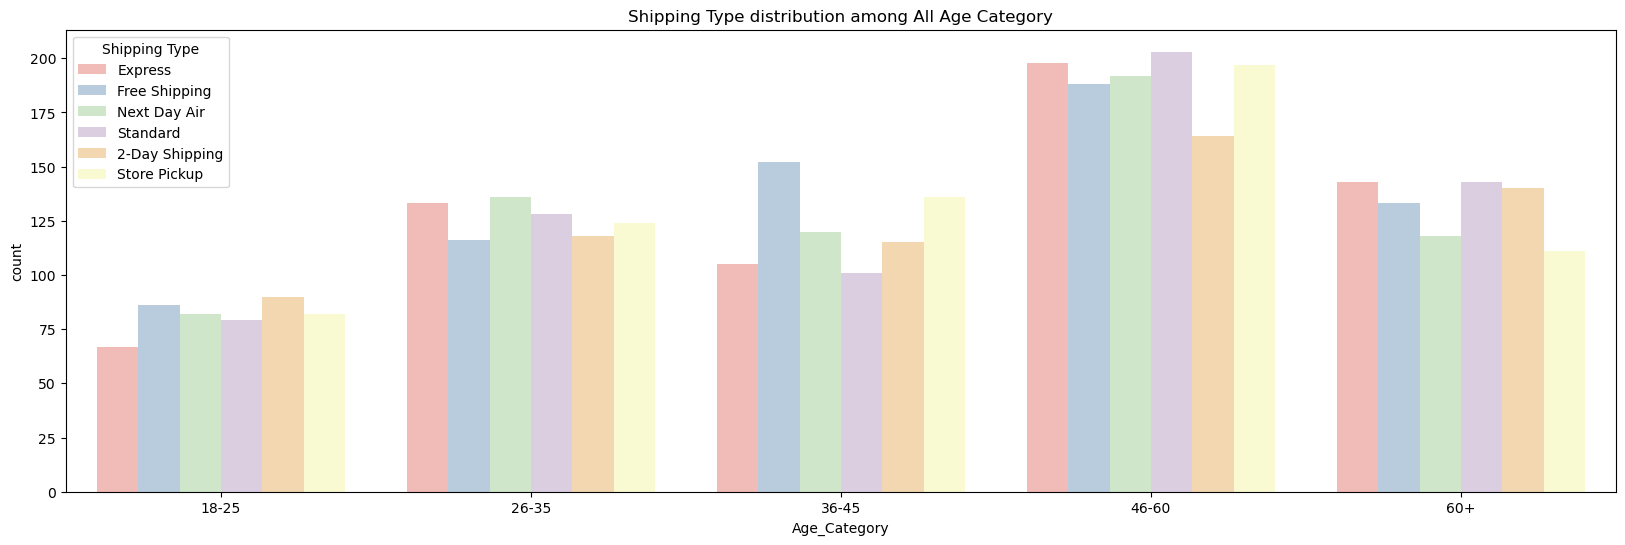

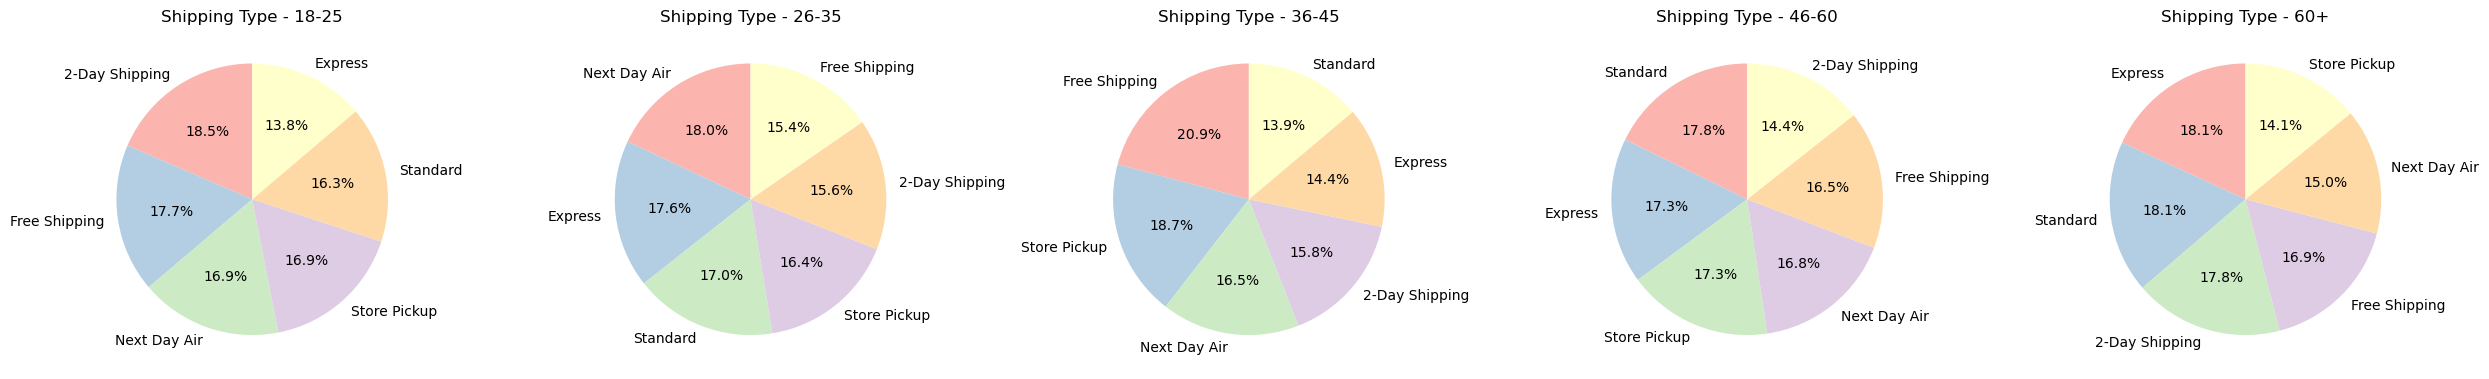

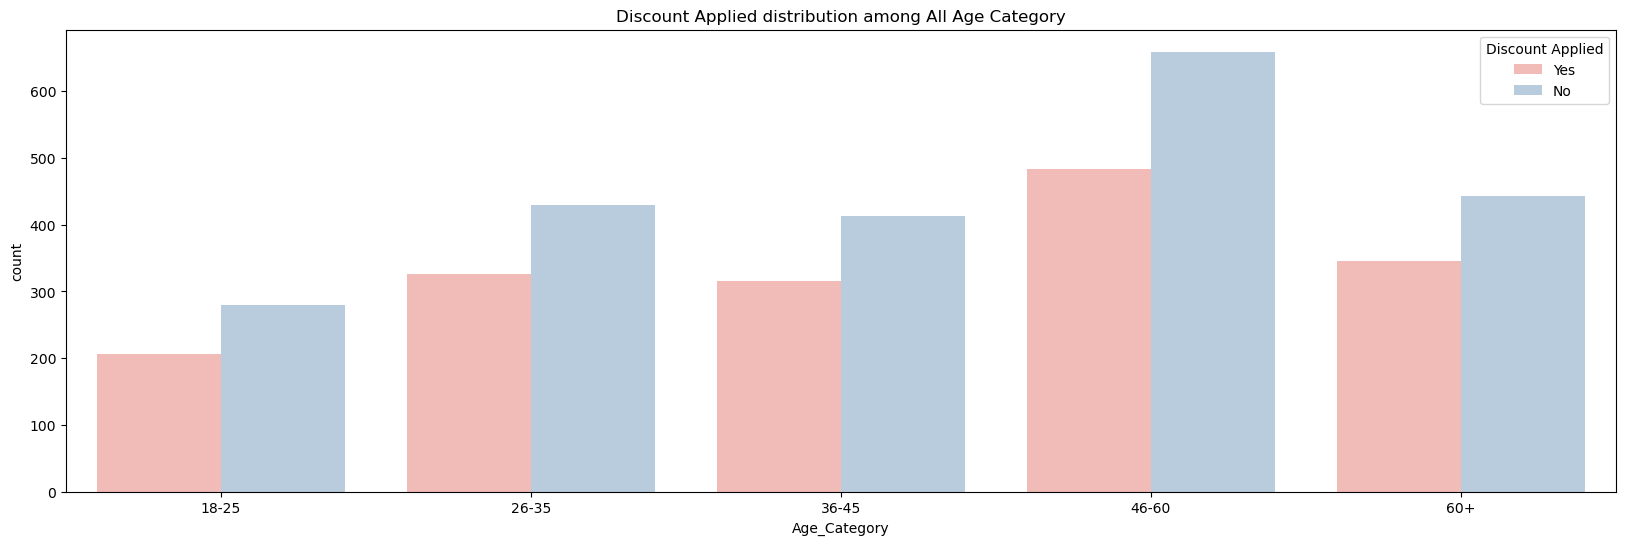

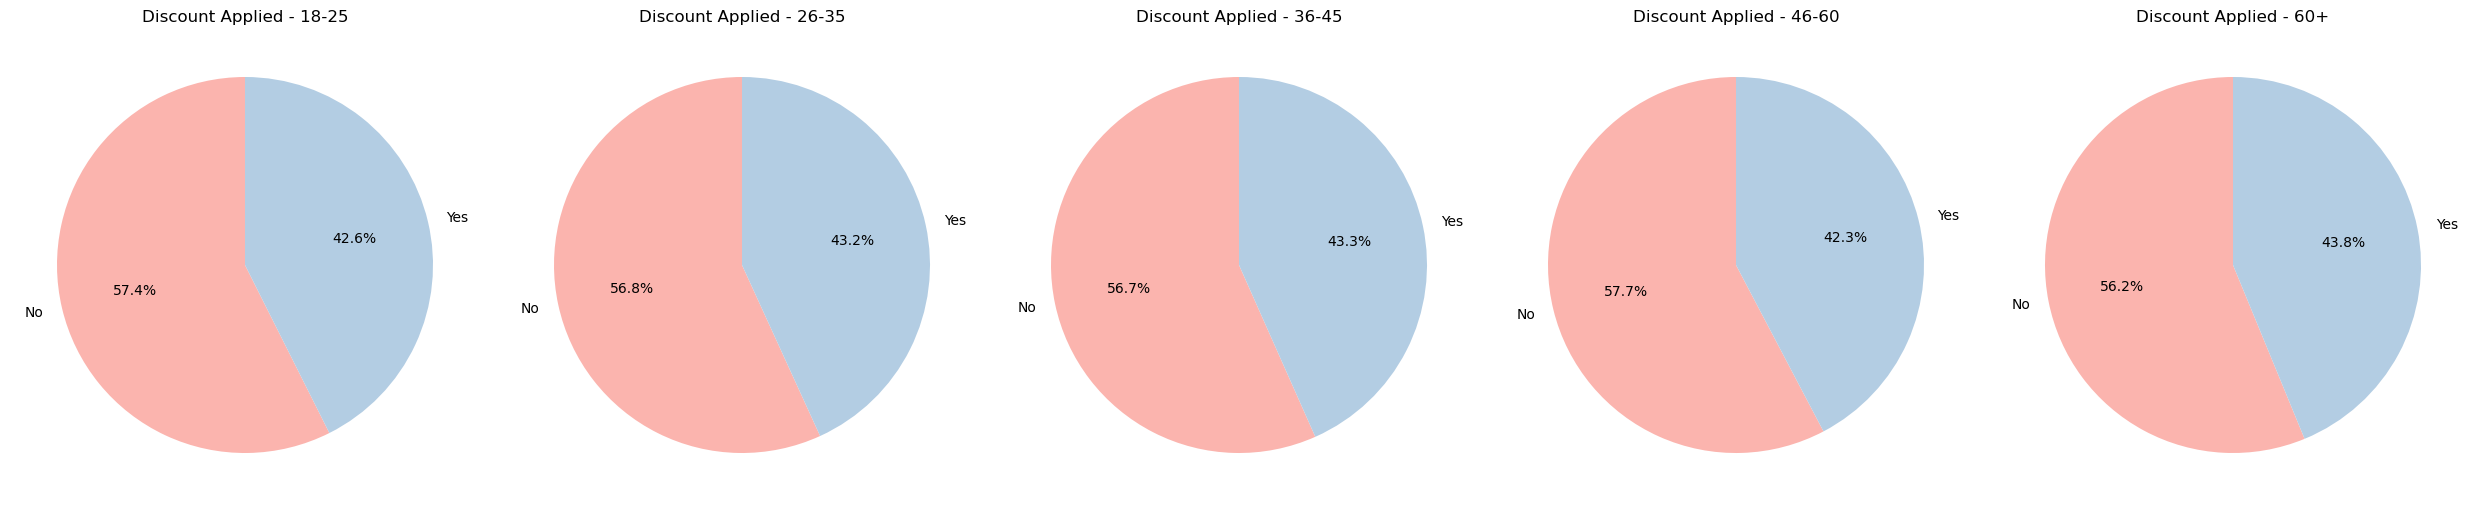

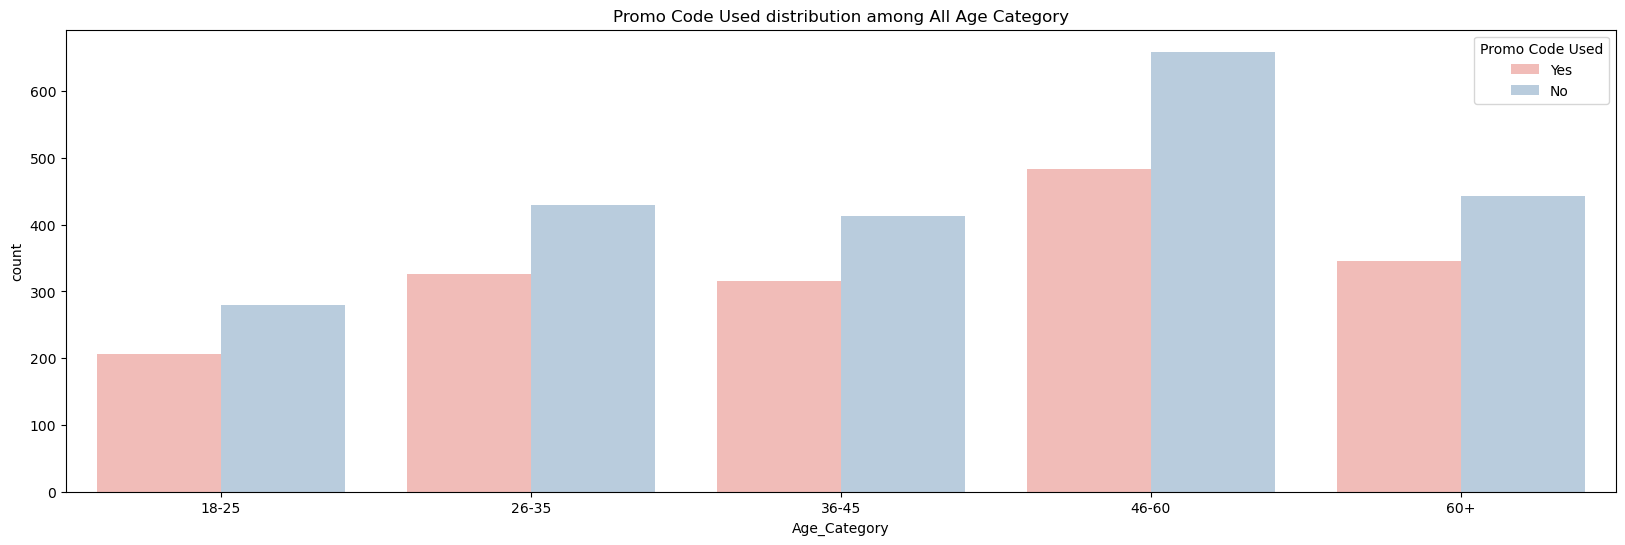

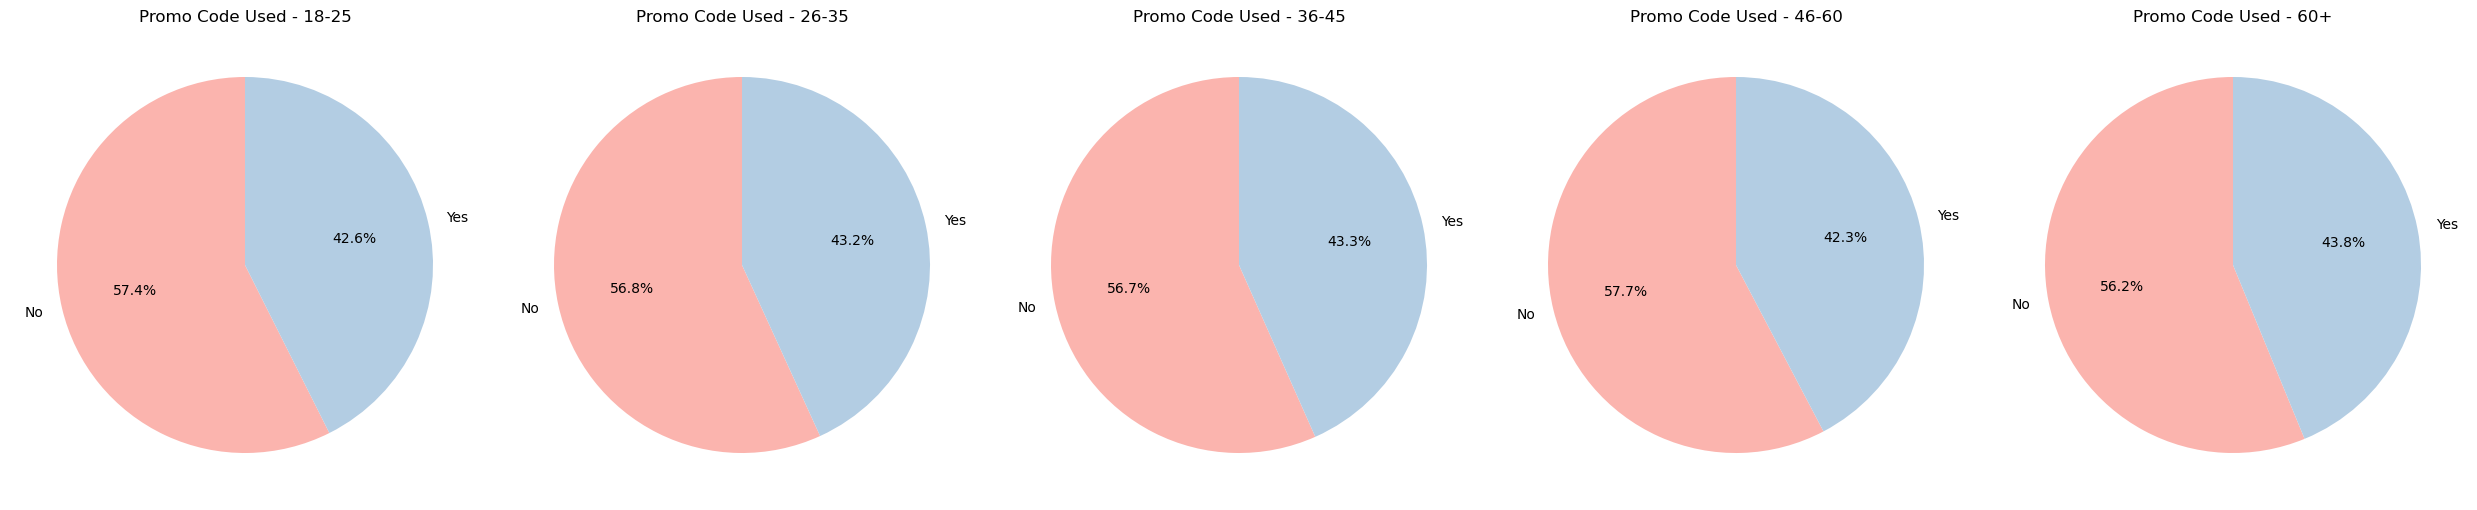

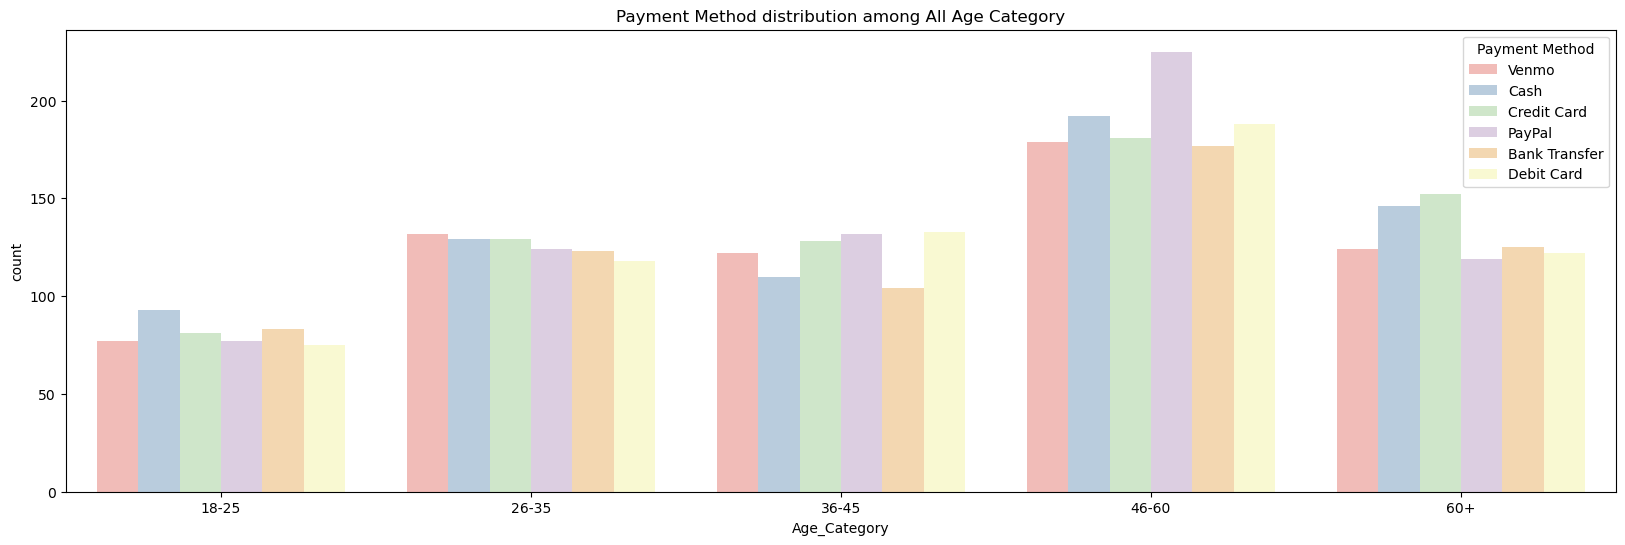

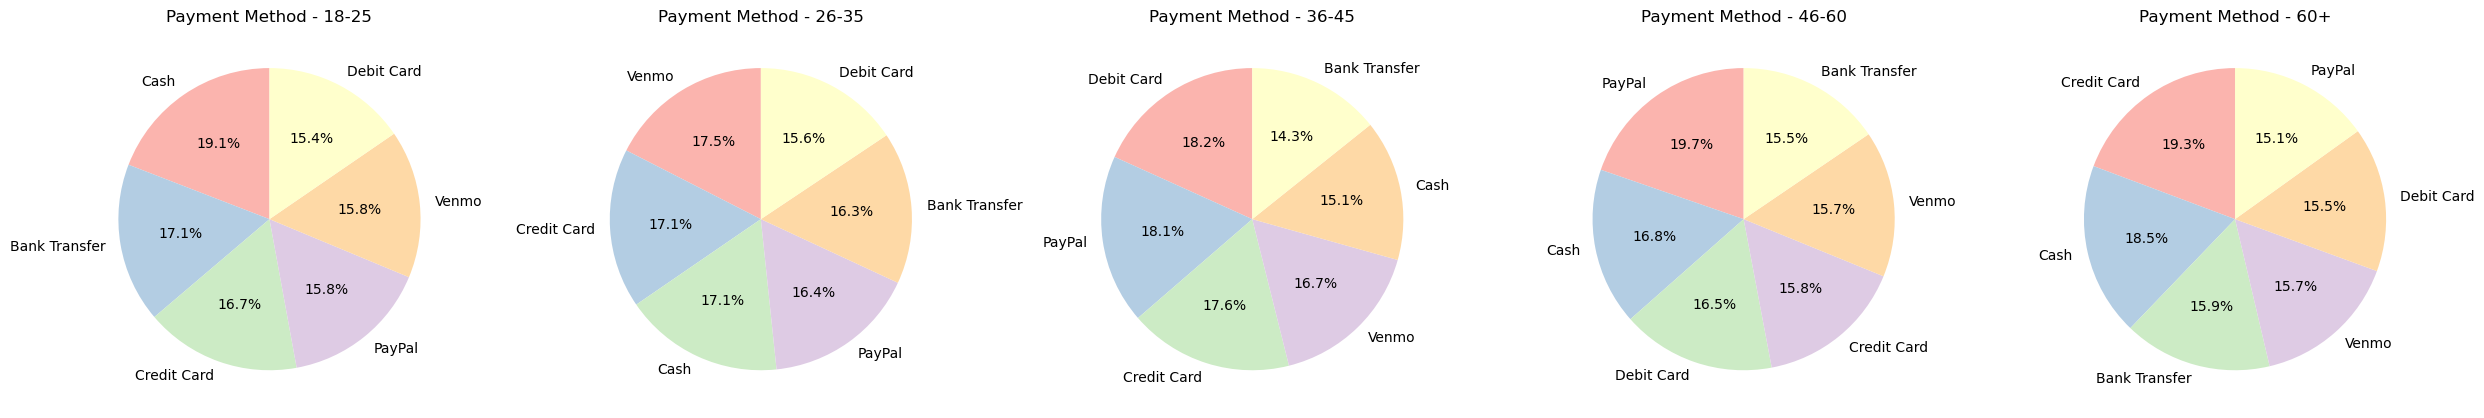

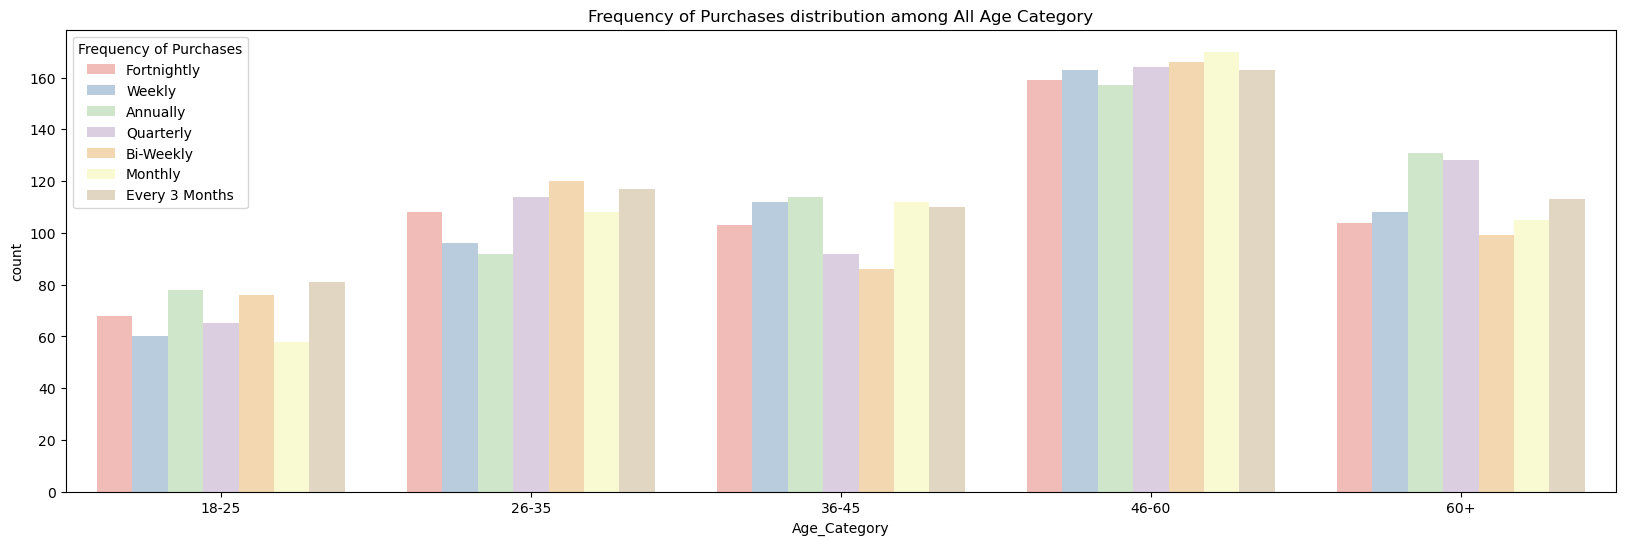

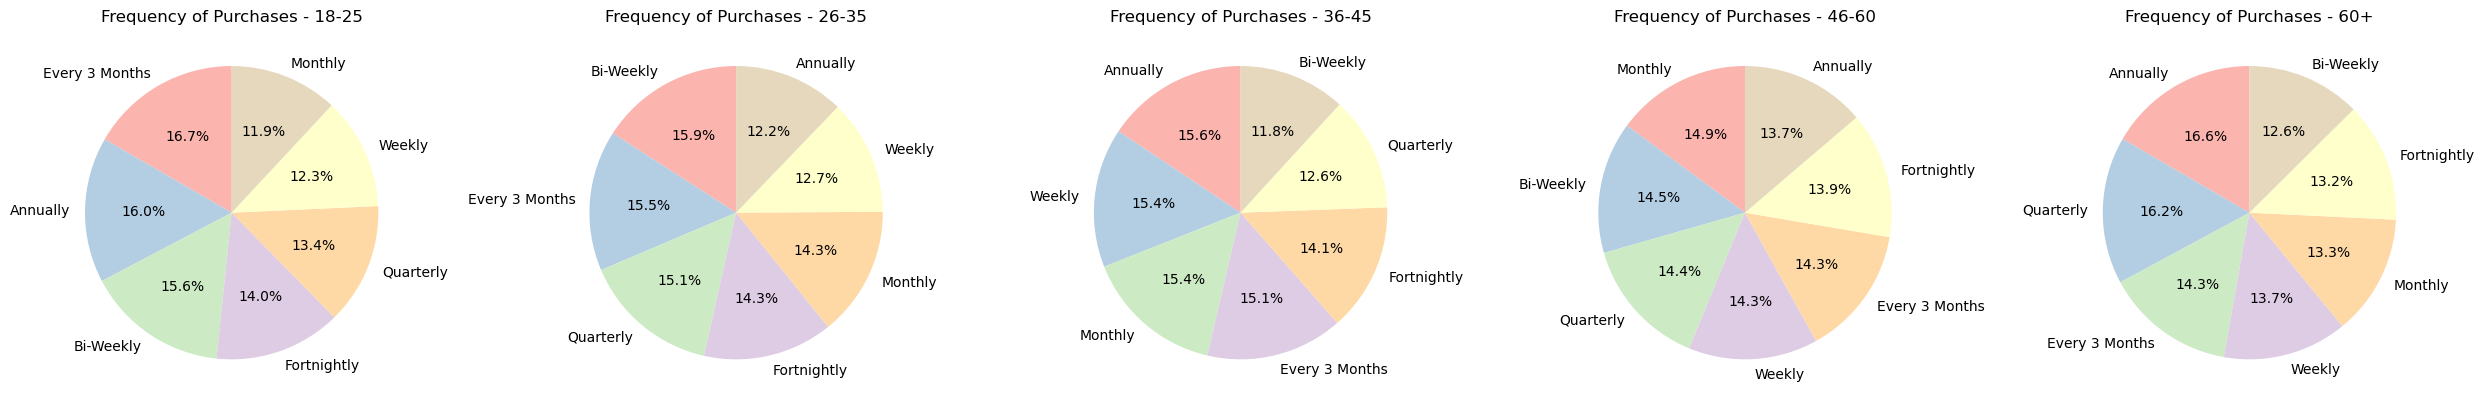

In [37]:
cols = ['Gender', 'Category', 'Size', 'Season', 'Subscription Status', 'Shipping Type', 'Discount Applied', 'Promo Code Used', 'Payment Method', 'Frequency of Purchases']

# Iterate through each column
for col in cols:
    plt.figure(figsize=(20,6))
    sns.countplot(x= df['Age_Category'],hue=df[col],palette='Pastel1')
    plt.title(f'{col} distribution among All Age Category')
    plt.show()
    print('='*132)
    fig, axes = plt.subplots(nrows=1, ncols=len(labels), figsize=(25, 5))

    # Iterate through each age category
    for i, age_category in enumerate(labels):
        # Filter DataFrame for the specific age category
        subset_df = df[df['Age_Category'] == age_category]

        # Pie plot for color distribution
        color_counts = subset_df[col].value_counts()
        axes[i].pie(color_counts, labels=color_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Pastel1'))
        axes[i].set_title(f'{col} - {age_category}')

    # Adjust layout
    plt.tight_layout()
    plt.show()


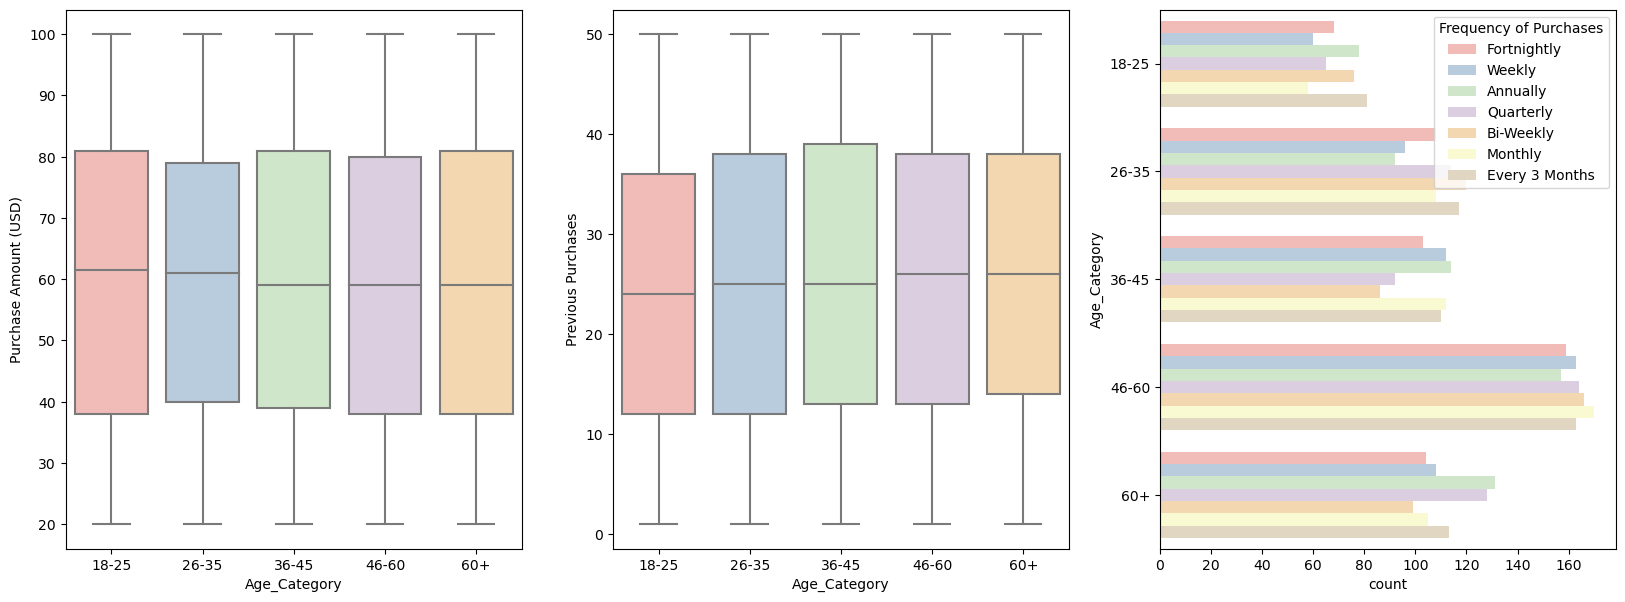

In [57]:
plt.figure(figsize=(20,7))
plt.subplot(1,3,1)
sns.boxplot(y=df['Purchase Amount (USD)'],x=df['Age_Category'],palette='Pastel1')
plt.title('Purchasing ')
plt.subplot(1,3,2)
sns.boxplot(y=df['Previous Purchases'],x=df['Age_Category'],palette='Pastel1')
plt.title()
plt.subplot(1,3,3)
sns.countplot(hue=df['Frequency of Purchases'],y=df['Age_Category'],palette='Pastel1')
plt.title()
plt.show()

### `Gender Analysis`

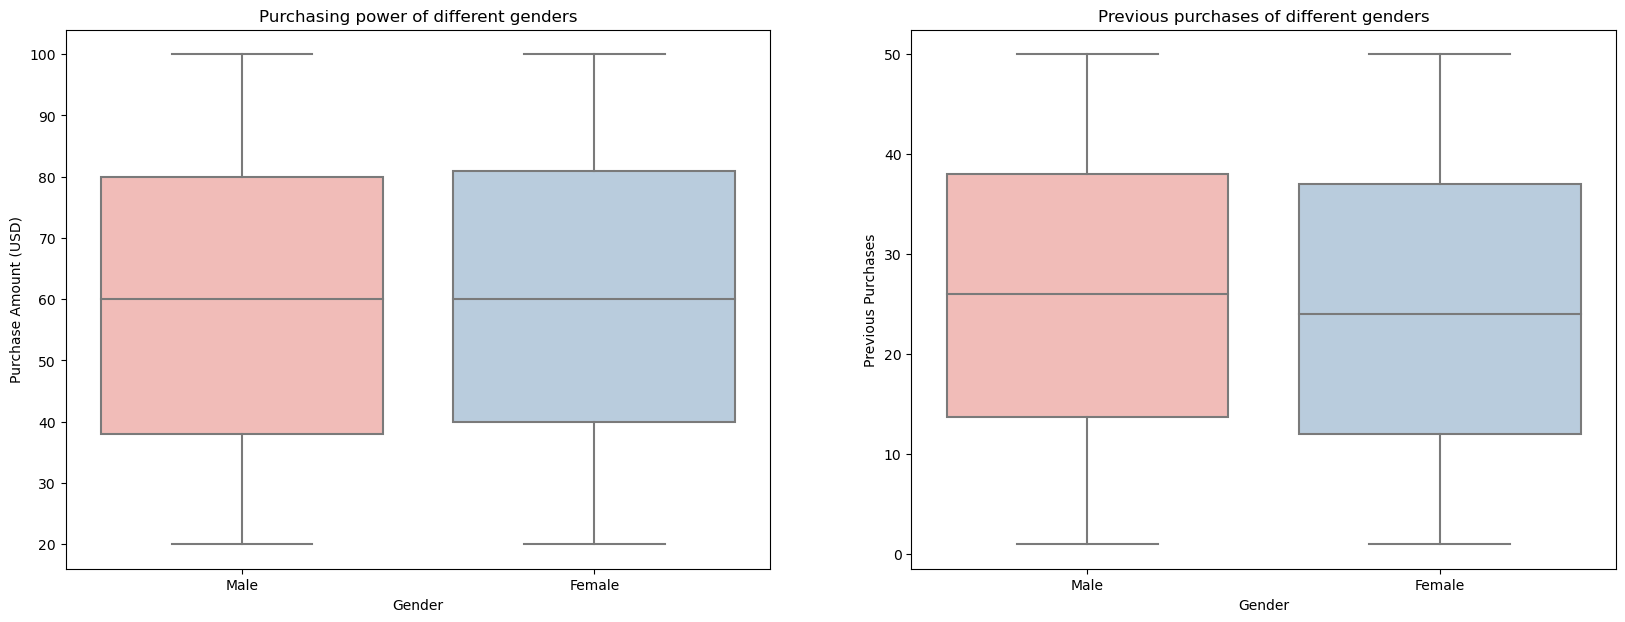

In [62]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
sns.boxplot(y=df['Purchase Amount (USD)'],x=df['Gender'],palette='Pastel1')
plt.title('Purchasing power of different genders')
plt.subplot(1,2,2)
sns.boxplot(y=df['Previous Purchases'],x=df['Gender'],palette='Pastel1')
plt.title('Previous purchases of different genders')
plt.show()

In [66]:
df.groupby('Gender')['Item Purchased'].count()

Gender
Female    1248
Male      2652
Name: Item Purchased, dtype: int64

In [75]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases', 'Age_Category'],
      dtype='object')

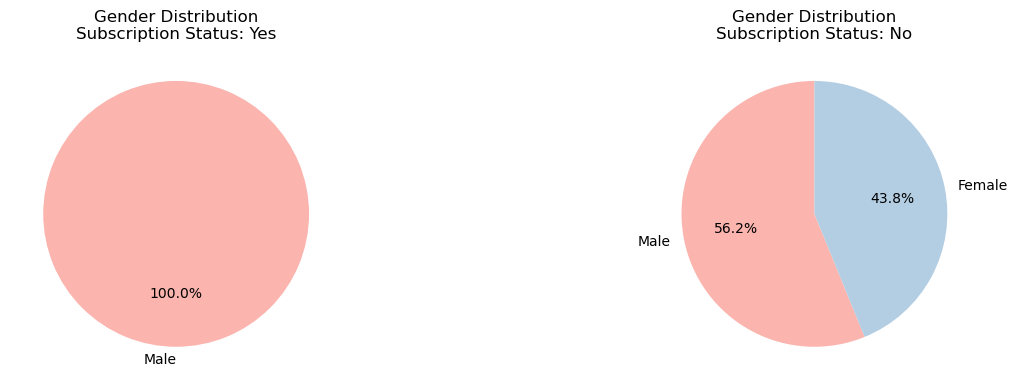

In [96]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

# Iterate through each Subscription Status
for i, sub_status in enumerate(df['Subscription Status'].unique()):
    # Filter DataFrame for the specific Subscription Status
    subset_df = df[df['Subscription Status'] == sub_status]

    # Pie plot for gender distribution
    gender_counts = subset_df['Gender'].value_counts()
    axes[i].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Pastel1'))
    axes[i].set_title(f'Gender Distribution\nSubscription Status: {sub_status}')

# Adjust layout
plt.tight_layout()
plt.show()

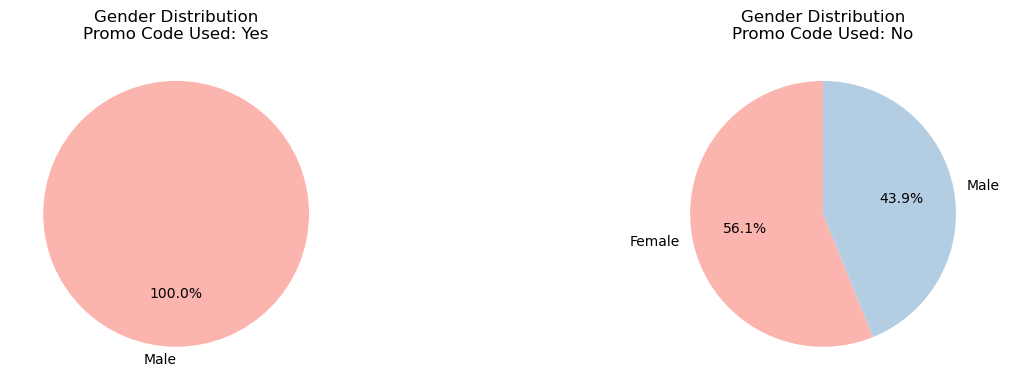

In [97]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

# Iterate through each Subscription Status
for i, sub_status in enumerate(df['Promo Code Used'].unique()):
    # Filter DataFrame for the specific Subscription Status
    subset_df = df[df['Promo Code Used'] == sub_status]

    # Pie plot for gender distribution
    gender_counts = subset_df['Gender'].value_counts()
    axes[i].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Pastel1'))
    axes[i].set_title(f'Gender Distribution\nPromo Code Used: {sub_status}')

# Adjust layout
plt.tight_layout()
plt.show()

In [99]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases', 'Age_Category'],
      dtype='object')

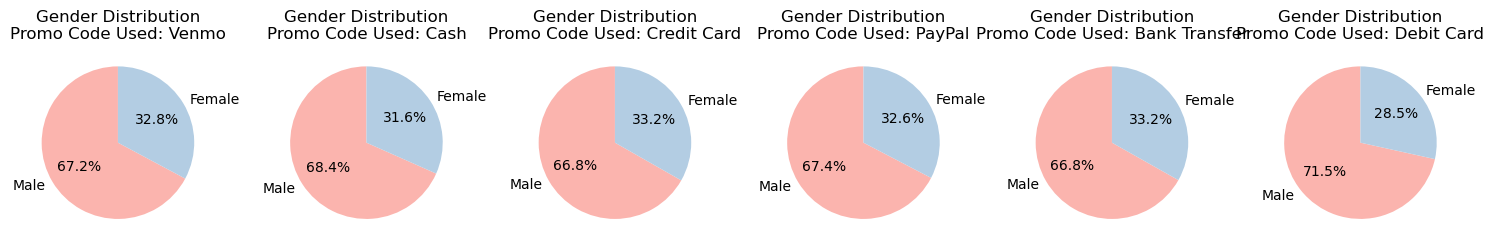

In [107]:
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(15, 4))

# Iterate through each Subscription Status
for i, sub_status in enumerate(df['Payment Method'].unique()):
    # Filter DataFrame for the specific Subscription Status
    subset_df = df[df['Payment Method'] == sub_status]

    # Pie plot for gender distribution
    gender_counts = subset_df['Gender'].value_counts()
    axes[i].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Pastel1'))
    axes[i].set_title(f'Gender Distribution\nPromo Code Used: {sub_status}')

# Adjust layout
plt.tight_layout()
plt.show()